# EXPLORATORY DATA ANALYSIS ON A DATASET

Tasks:
1.	Data Cleaning and Preparation:
●	Load the dataset into a data frame or equivalent data structure.
●	Handle missing values appropriately (e.g., imputation, deletion).
●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
●	Detect and treat outliers if necessary.


In [1]:
import pandas as pd
df=pd.read_csv("Cardiotocographic.csv")
df.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [7]:
# Handling missing values
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [8]:
df_new=df.dropna()

In [9]:
df_new.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [11]:
# Correct data types
for i in df_new.columns:
    df_new[i]=pd.to_numeric(df_new[i])

C:\Users\vanam\AppData\Local\Temp\ipykernel_21168\1816813759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[i]=pd.to_numeric(df_new[i])


In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2105 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2105 non-null   float64
 2   FM        2105 non-null   float64
 3   UC        2105 non-null   float64
 4   DL        2105 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2105 non-null   float64
 8   MSTV      2105 non-null   float64
 9   ALTV      2105 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 246.7 KB


In [17]:
# Detect Outliers using IQR
Q1=df_new.quantile(0.25)
Q3=df_new.quantile(0.75)
IQR=Q3-Q1
df_no_outliers=df_new[~((df_new < (Q1-1.5*IQR))|(df_new >(Q3+1.5*IQR))).any(axis=1)]

In [18]:
df_no_outliers

LB        AC       FM        UC        DL   DS   DP  ASTV  MSTV  \
1     132.000000  0.006380  0.00000  0.006380  0.003190  0.0  0.0  17.0   2.1   
2     133.000000  0.003322  0.00000  0.008306  0.003322  0.0  0.0  16.0   2.1   
4     131.948232  0.006515  0.00000  0.008143  0.000000  0.0  0.0  16.0   2.4   
37    114.000000  0.004559  0.00000  0.004559  0.003040  0.0  0.0  24.0   3.2   
59    144.000000  0.008143  0.00000  0.006595  0.000000  0.0  0.0  33.0   1.1   
...          ...       ...      ...       ...       ...  ...  ...   ...   ...   
2113  136.000000  0.000000  0.00207  0.008282  0.000000  0.0  0.0  67.0   1.5   
2117  140.000000  0.000000  0.00000  0.007812  0.000000  0.0  0.0  79.0   0.3   
2118  140.000000  0.000000  0.00000  0.006470  0.000898  0.0  0.0  79.0   0.5   
2119  140.000000  0.000000  0.00000  0.006764  0.001127  0.0  0.0  79.0   0.6   
2120  140.000000  0.000000  0.00000  0.004975  0.001244  0.0  0.0  77.0   0.7   

           ALTV  MLTV  Width  Tendency  NSP  
1      0.000000  10.4  130.0  0.000000  1.0  
2      0.000000  13.4  130.0  0.000000  1.0  
4      0.000000  19.9  117.0  1.000000  1.0  
37     0.000000  16.2  134.0  0.000000  1.0  
59    -0.060411   6.2  100.0  1.000000  1.0  
...         ...   ...    ...       ...  ...  
2113  11.000000   4.7   38.0  0.000000  1.0  
2117  20.000000   8.5   26.0  1.002932  1.0  
2118  26.428179   7.0   21.0  1.000000  1.0  
2119  27.000000   6.4   26.0  1.000000  1.0  
2120  17.000000   6.0   31.0  0.000000  1.0  

[885 rows x 14 columns]

2.	Statistical Summary:
●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).
●	Highlight any interesting findings from this summary.


In [19]:
df_no_outliers.describe()

LB          AC          FM          UC          DL     DS  \
count  885.000000  885.000000  885.000000  885.000000  885.000000  885.0   
mean   131.846366    0.004094    0.000602    0.004956    0.001542    0.0   
std      9.453055    0.003752    0.001335    0.002717    0.002216    0.0   
min    106.000000   -0.000122   -0.002467   -0.000101   -0.000124    0.0   
25%    125.000000    0.000000    0.000000    0.003109    0.000000    0.0   
50%    133.000000    0.003358    0.000000    0.005051    0.000000    0.0   
75%    138.000000    0.006747    0.000310    0.006928    0.003082    0.0   
max    160.000000    0.014068    0.006272    0.012072    0.008197    0.0   

          DP        ASTV        MSTV        ALTV        MLTV       Width  \
count  885.0  885.000000  885.000000  885.000000  885.000000  885.000000   
mean     0.0   42.389054    1.271093    3.162907    8.595633   67.757776   
std      0.0   15.079700    0.538078    6.031257    4.498767   32.580868   
min      0.0   15.000000    0.300000   -1.043619   -0.136053   12.000000   
25%      0.0   29.000000    0.900000    0.000000    5.600000   40.000000   
50%      0.0   41.000000    1.200000    0.000000    8.500000   61.000000   
75%      0.0   56.000000    1.600000    4.000000   11.400000   92.000000   
max      0.0   79.000000    3.200000   27.000000   20.000000  176.310998   

         Tendency    NSP  
count  885.000000  885.0  
mean     0.337906    1.0  
std      0.588384    0.0  
min     -1.006614    1.0  
25%      0.000000    1.0  
50%      0.000000    1.0  
75%      1.000000    1.0  
max      1.023635    1.0

In [20]:
df_no_outliers.median()

LB          133.000000
AC            0.003358
FM            0.000000
UC            0.005051
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         41.000000
MSTV          1.200000
ALTV          0.000000
MLTV          8.500000
Width        61.000000
Tendency      0.000000
NSP           1.000000
dtype: float64

--LB (Baseline FHR) shows moderate variability, as expected in normal fetal heart monitoring.
--AC (Accelerations) typically has a low mean because accelerations happen infrequently but are a positive sign of fetal health.
--FM (Fetal Movements) varies widely, suggesting differences in fetal activity.
--UC (Uterine Contractions) might show skewed distribution, since contractions increase closer to labor.
--DL, DS, DP (Deceleration types) often have low median values—frequent decelerations may indicate fetal distress.
--ASTV & ALTV measure abnormal variability; high values may correlate with risk of fetal hypoxia.
--MSTV & MLTV show how regular variability is distributed—low variability can be a sign of potential complications.

3.	Data Visualization:
●	Create histograms or boxplots to visualize the distributions of various numerical variables.
●	Use bar charts or pie charts to display the frequency of categories for categorical variables.
●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.
●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.


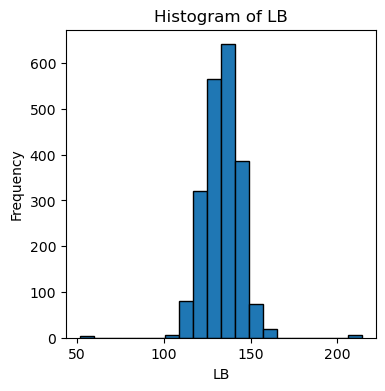

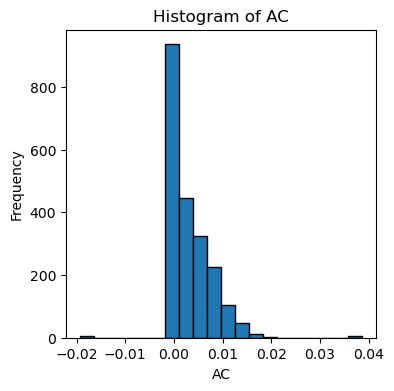

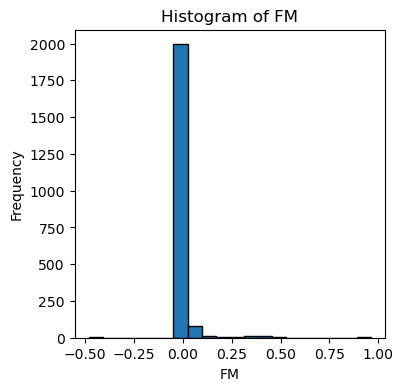

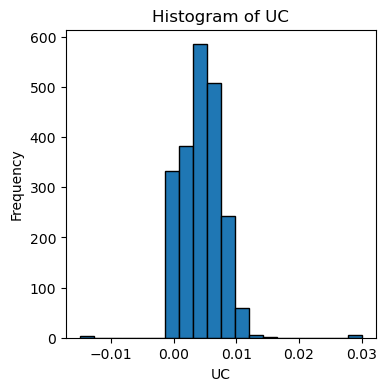

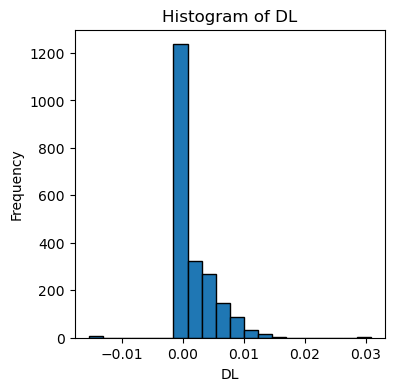

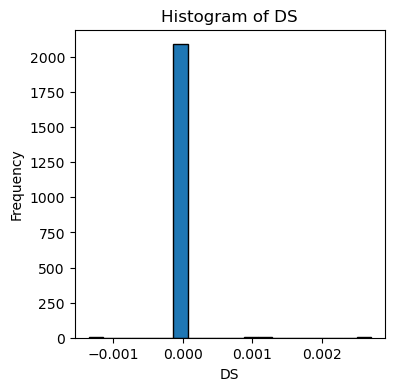

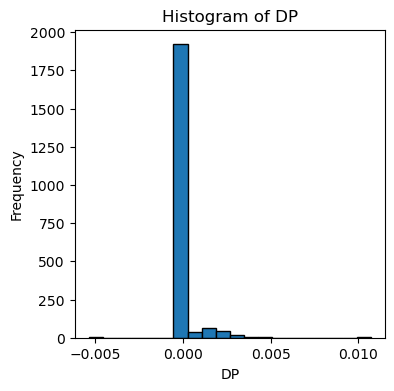

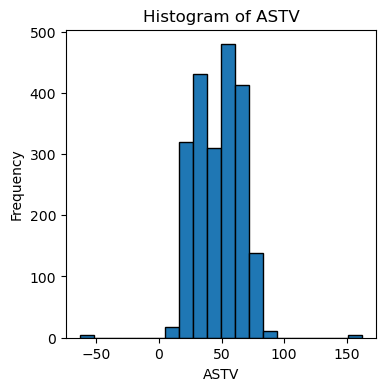

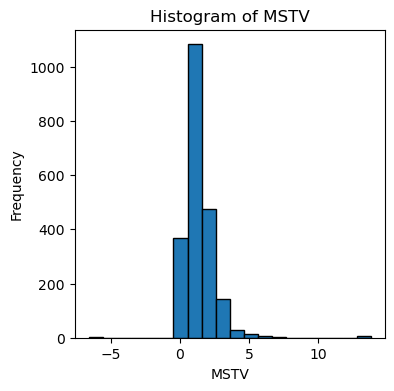

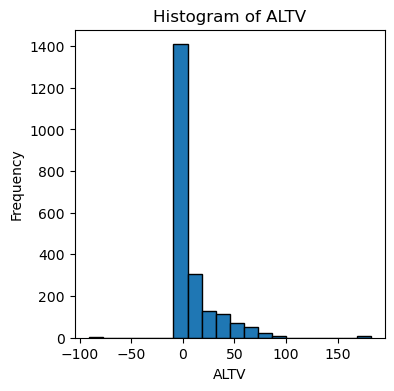

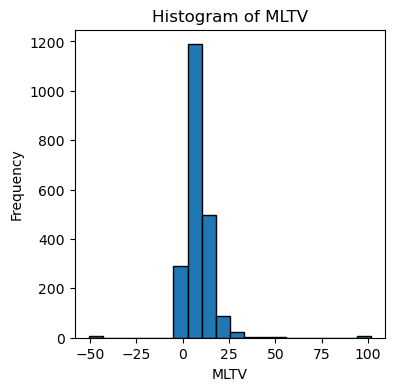

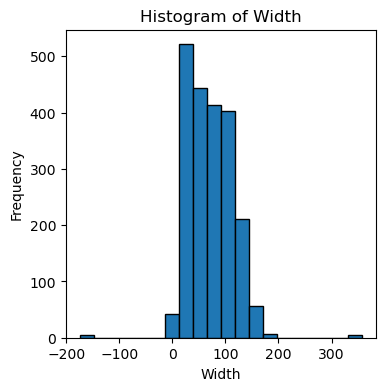

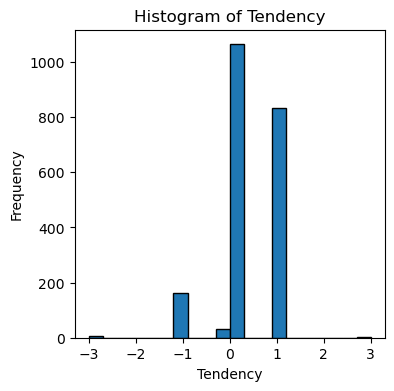

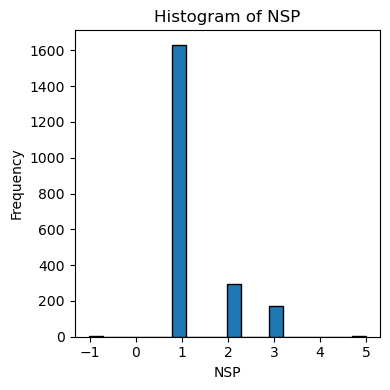

In [25]:
# Histograms

import matplotlib.pyplot as plt
cols=df_no_outliers.select_dtypes(include='number').columns

for col in cols:
    #plt.subplot(3, 3, index)
    plt.figure(figsize=(4, 4))
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.title("Histogram of " + col)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    index += 1

plt.tight_layout()
plt.show()

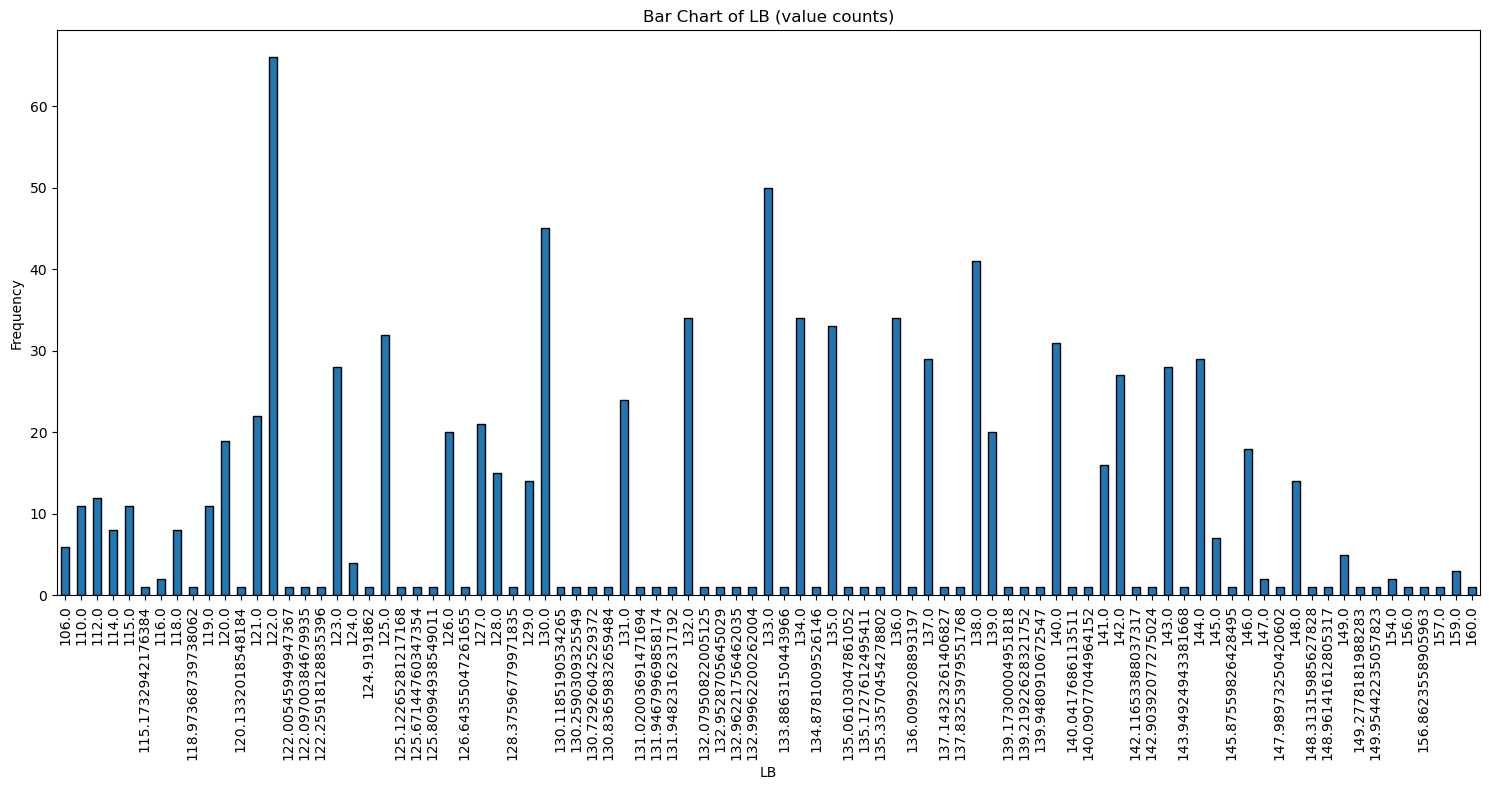

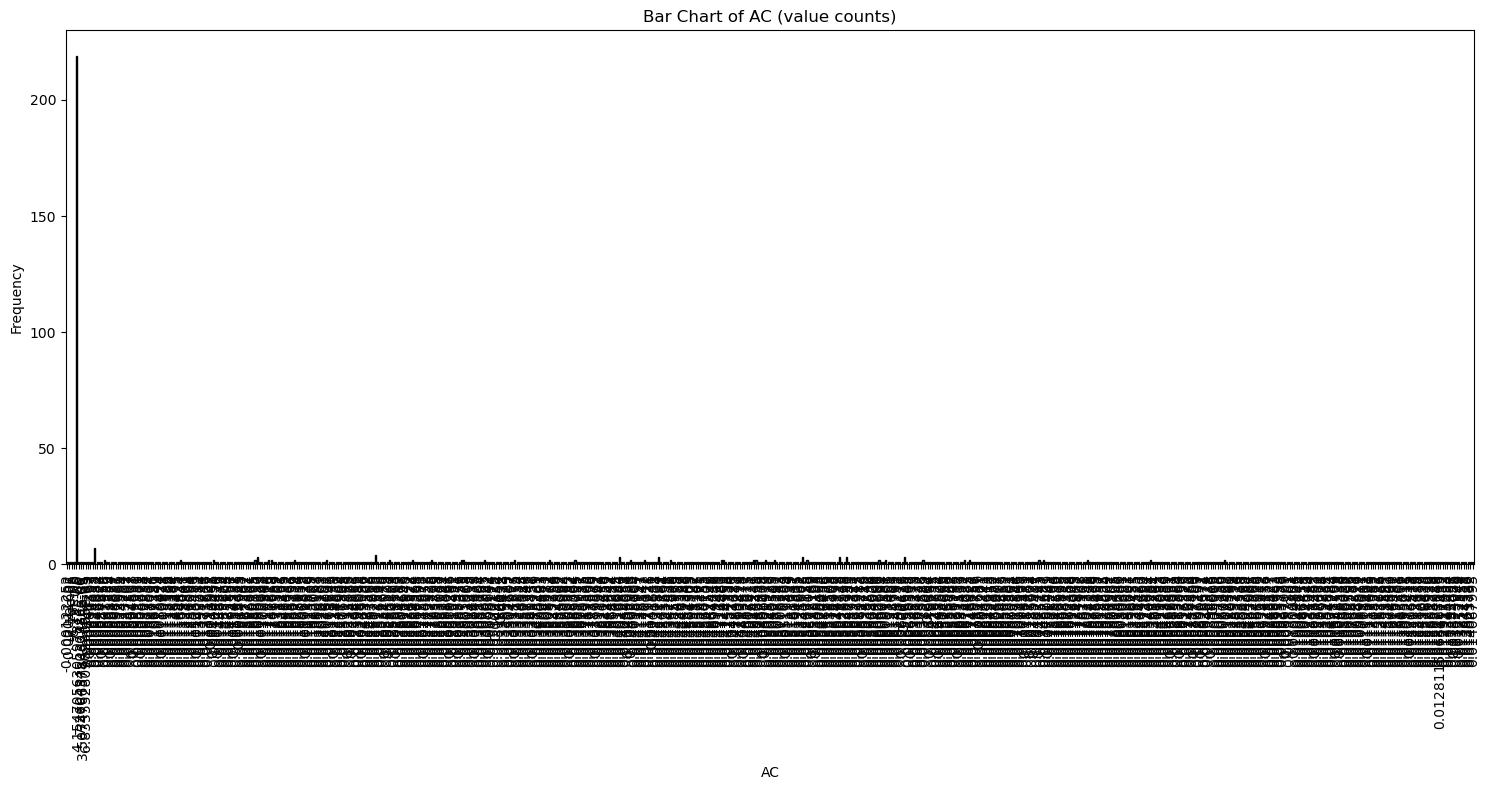

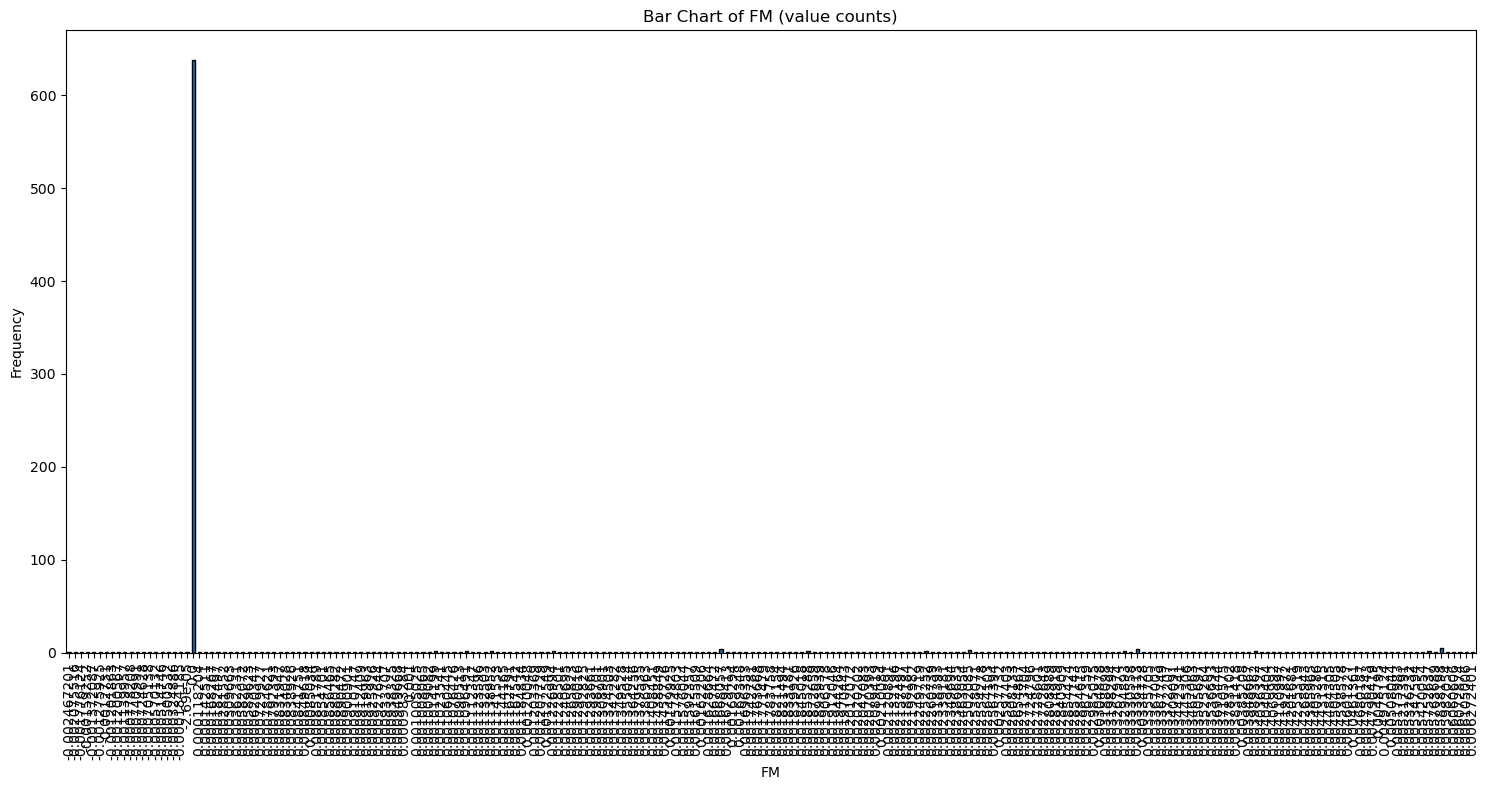

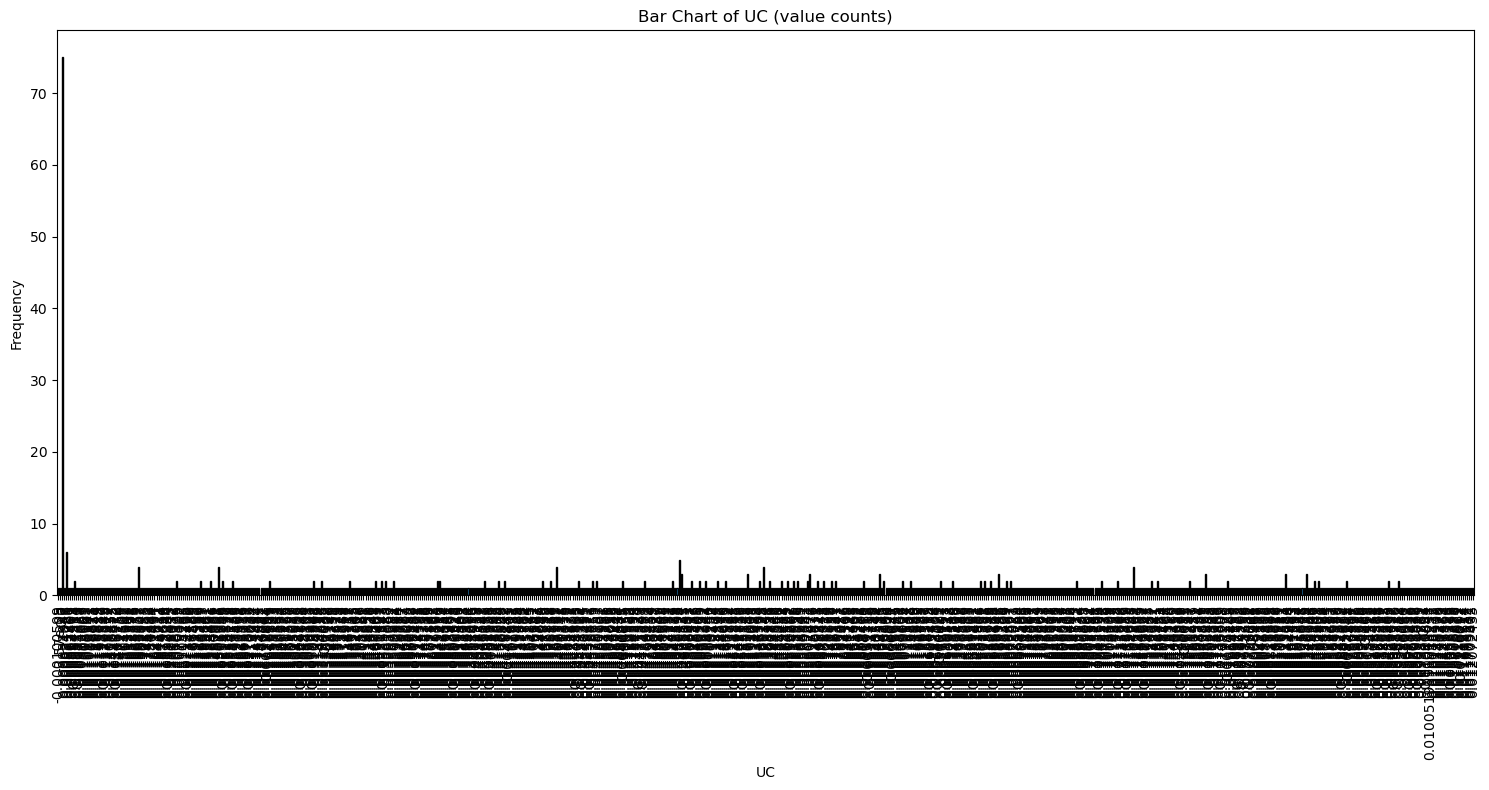

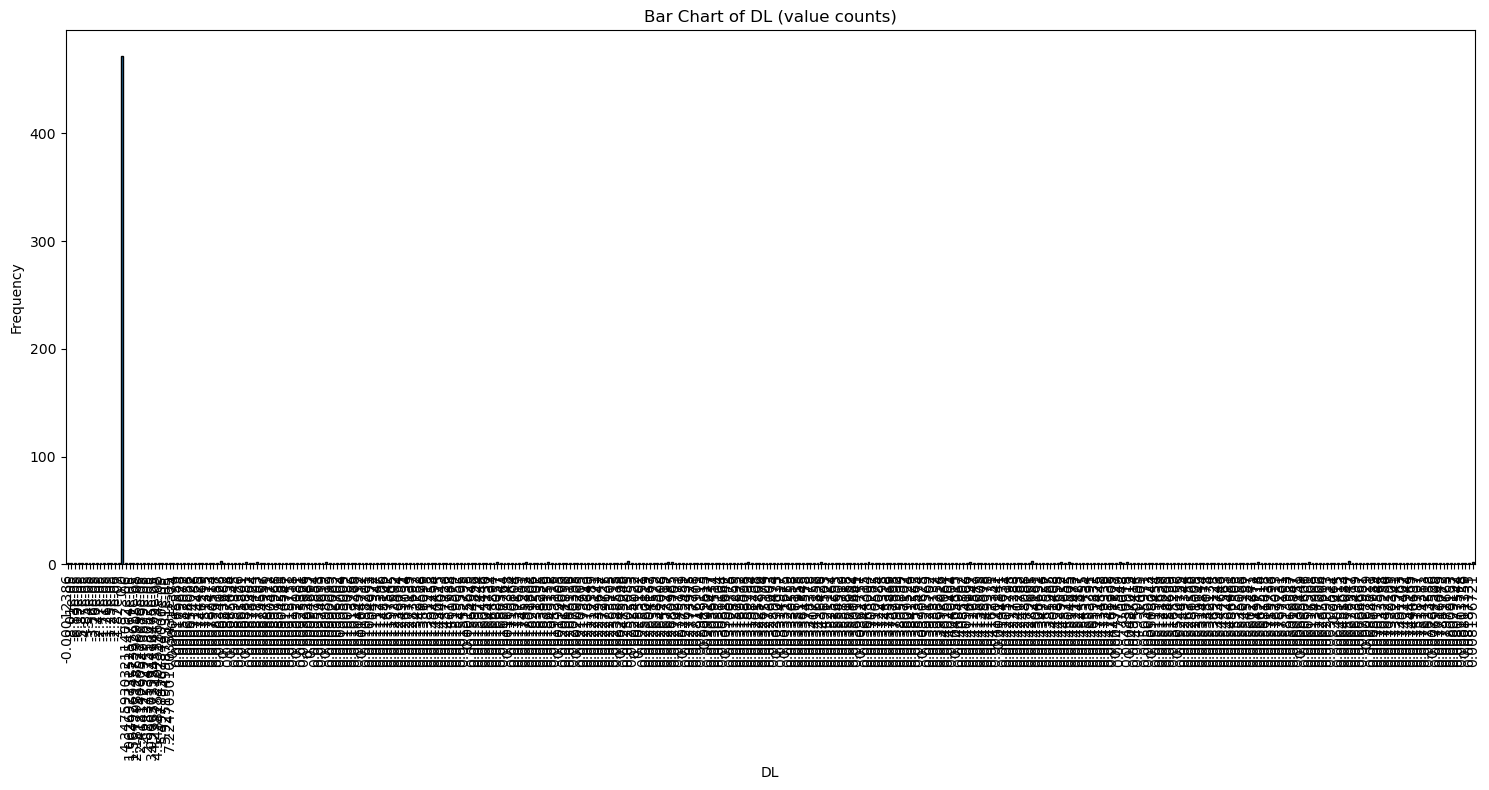

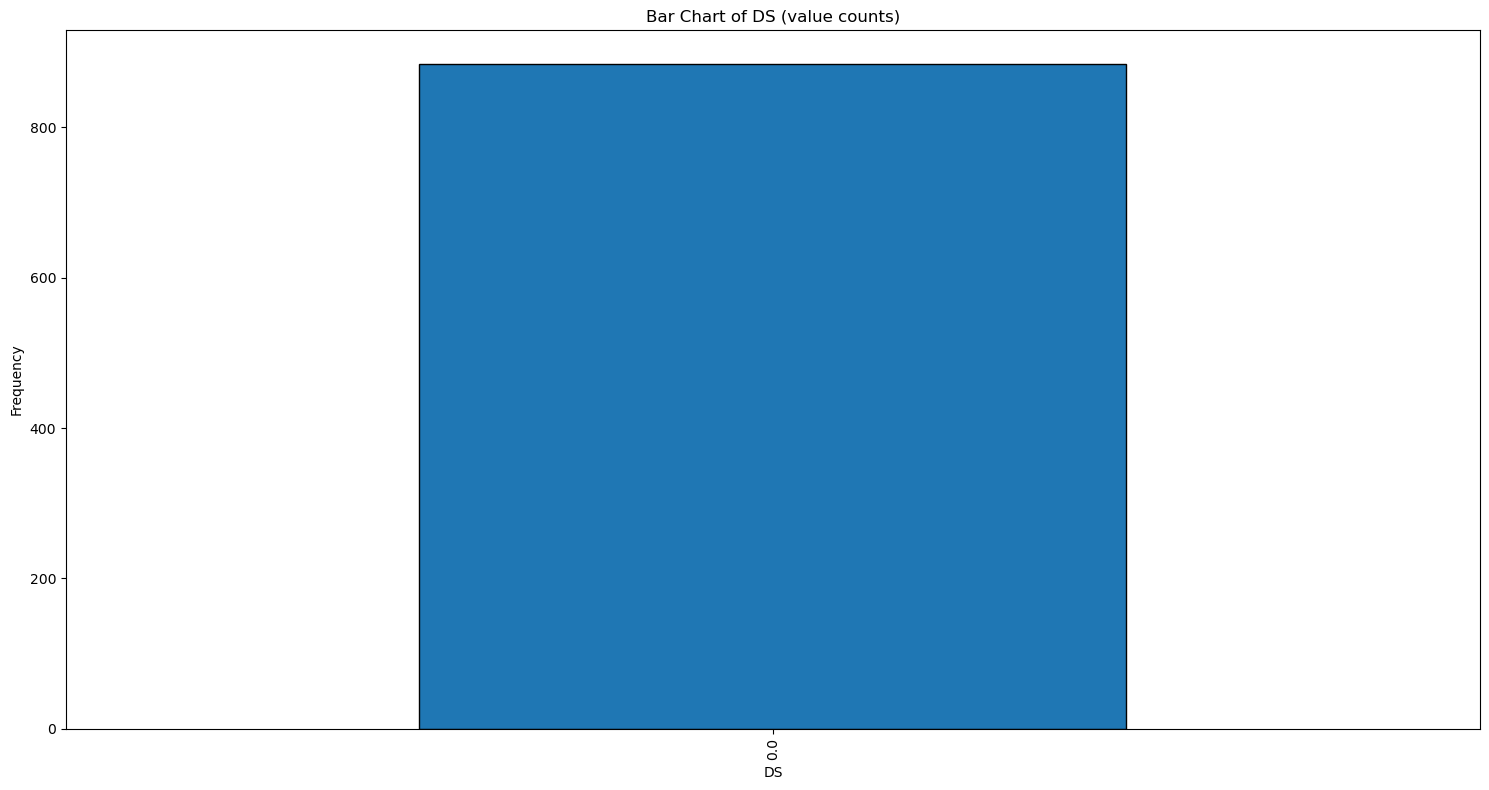

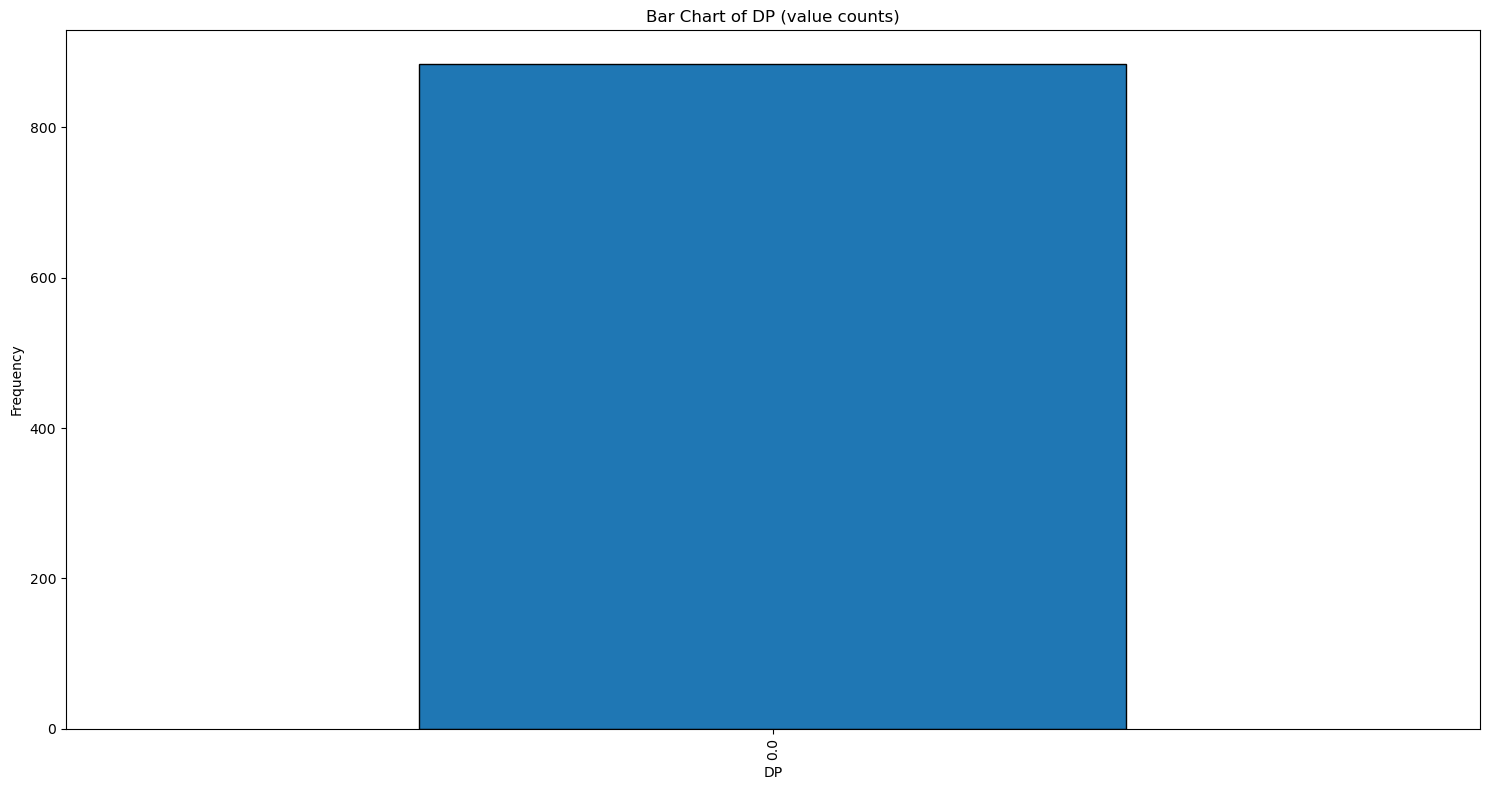

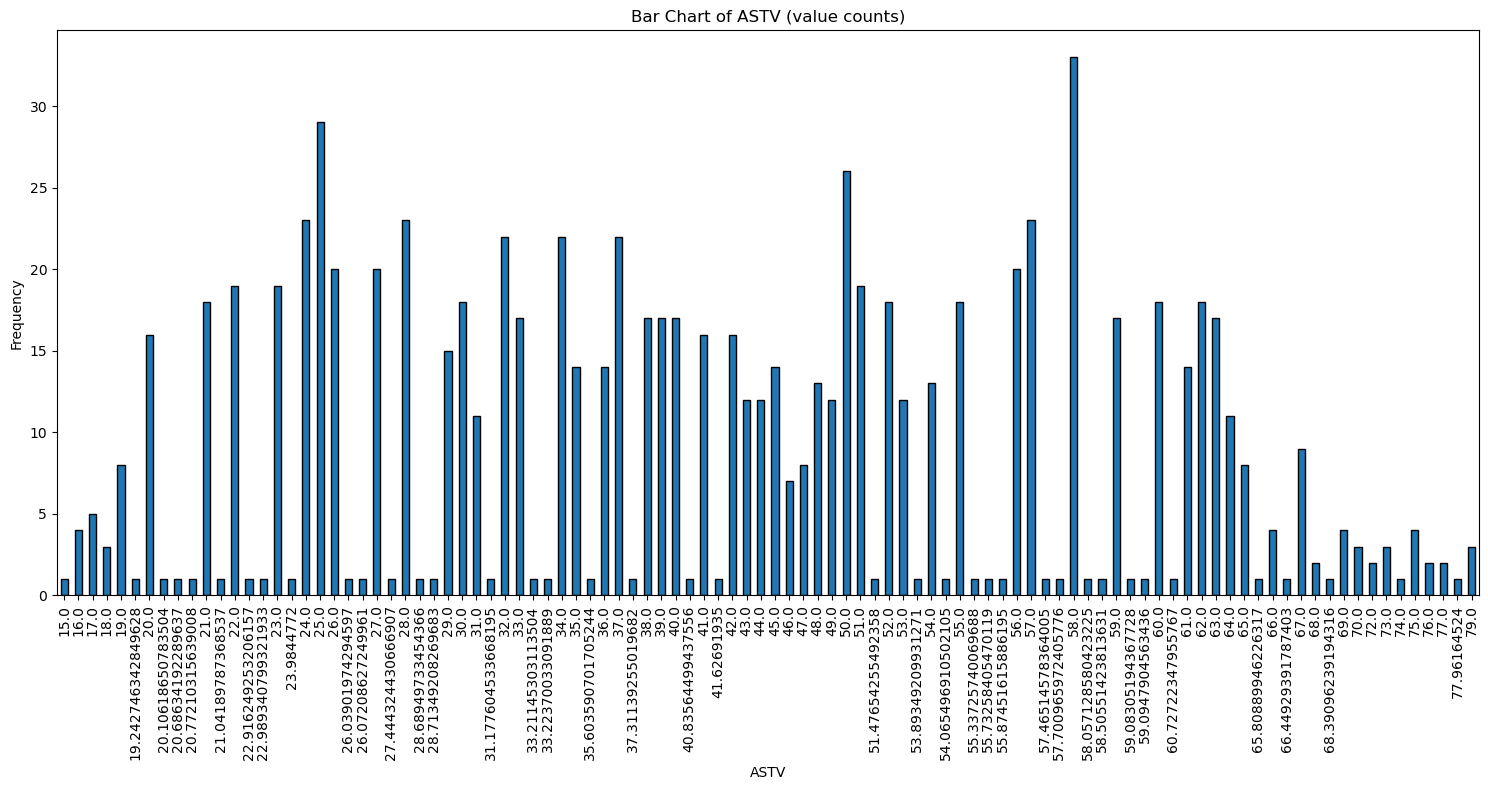

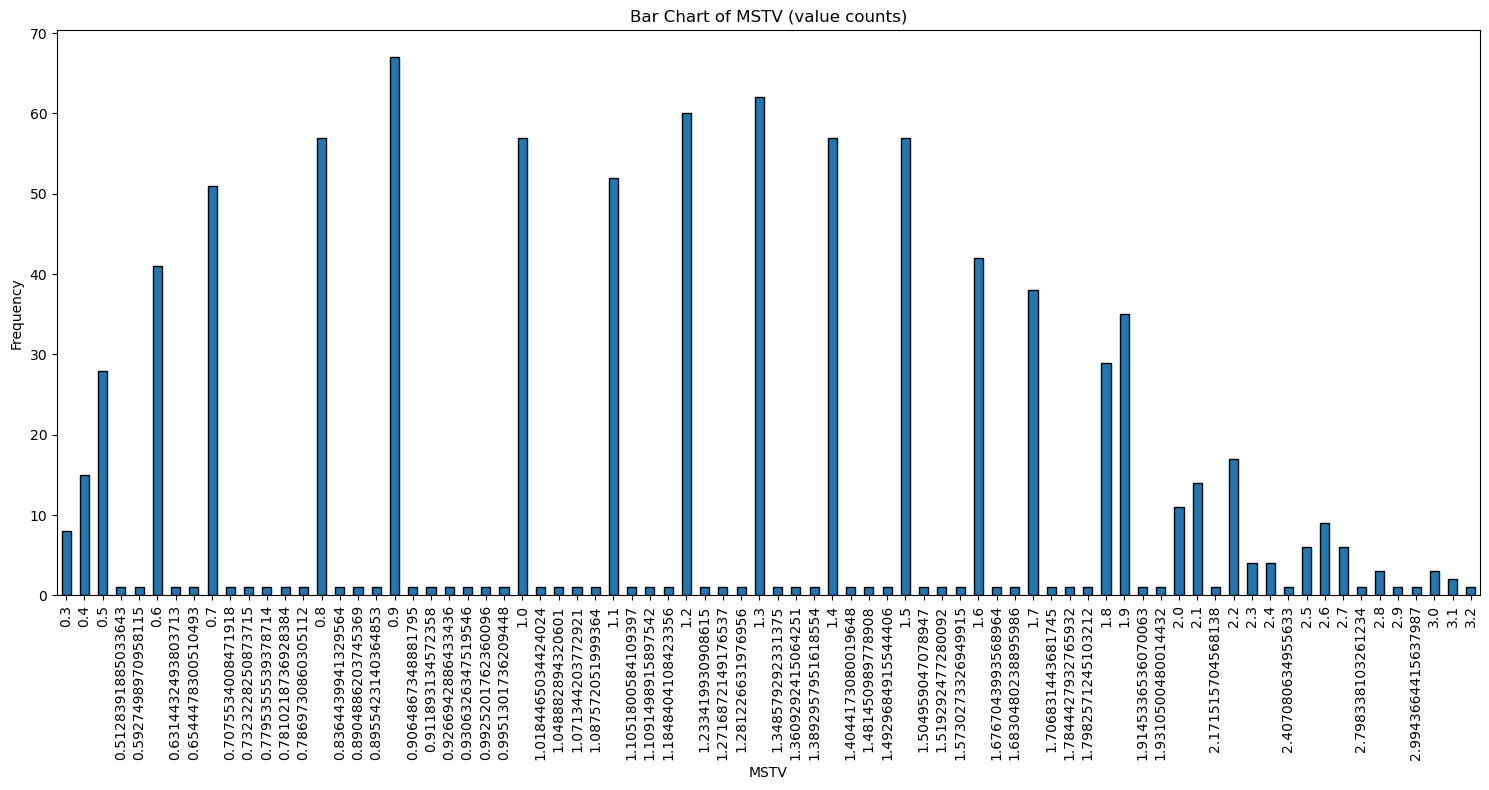

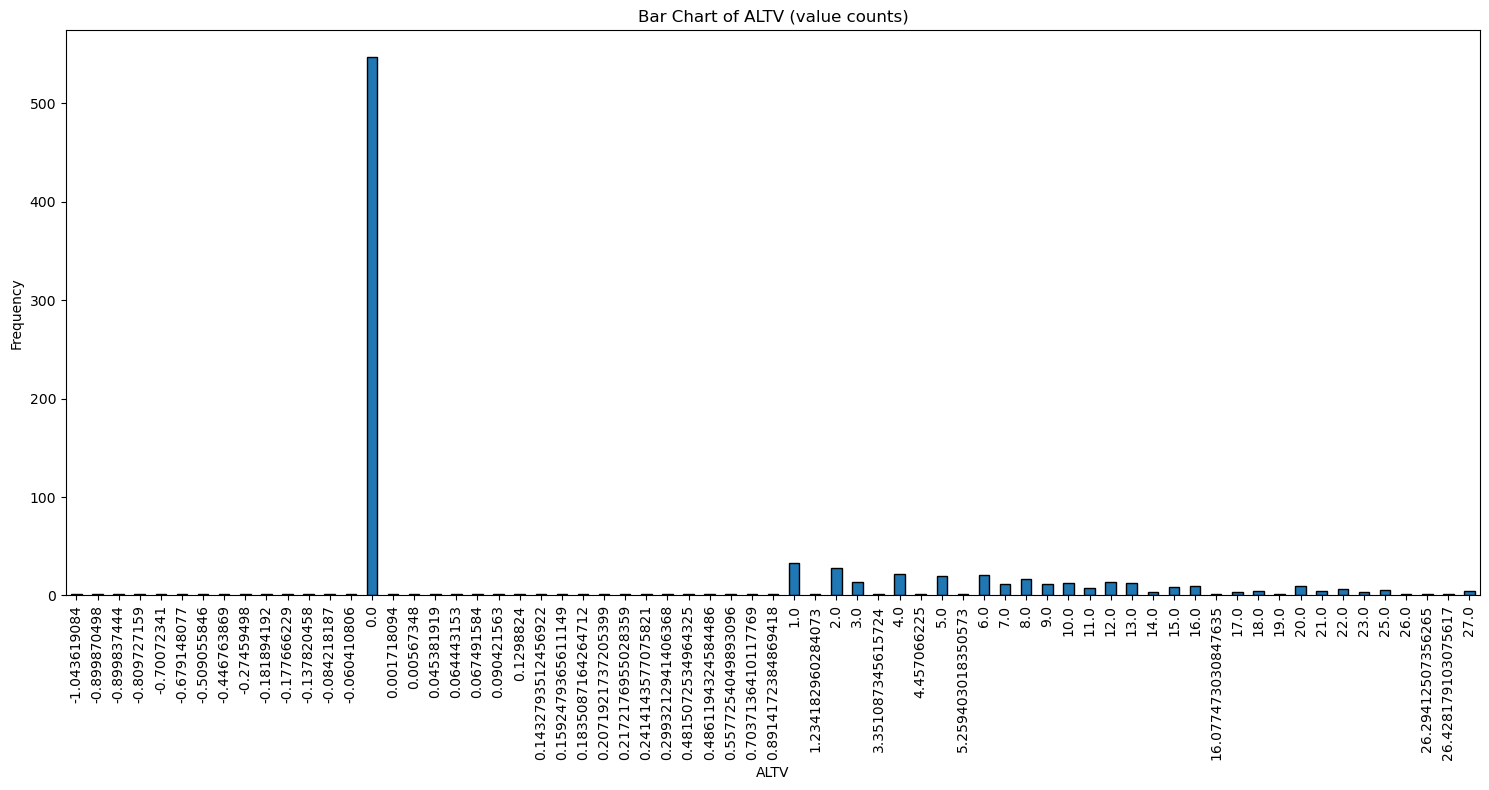

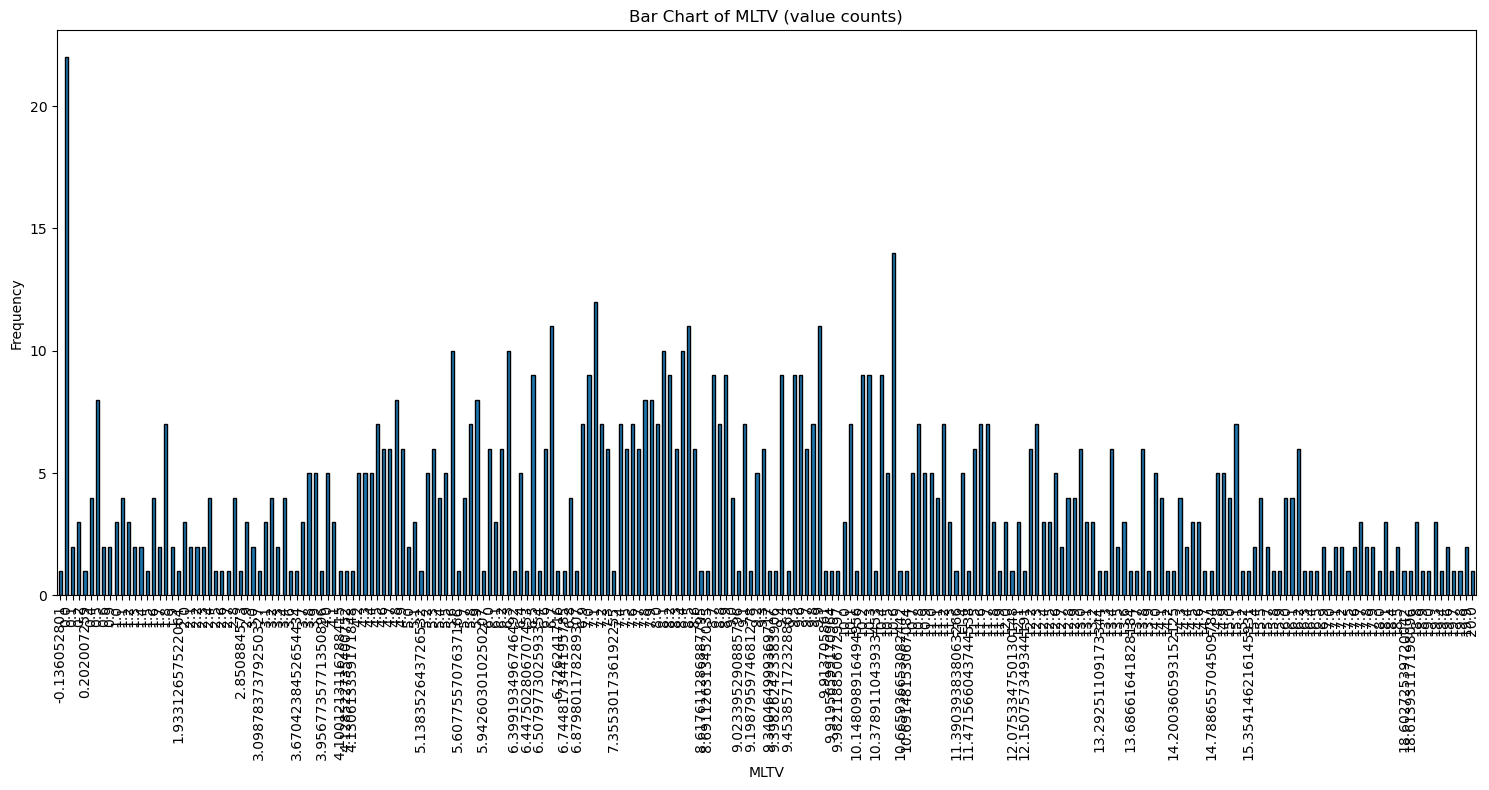

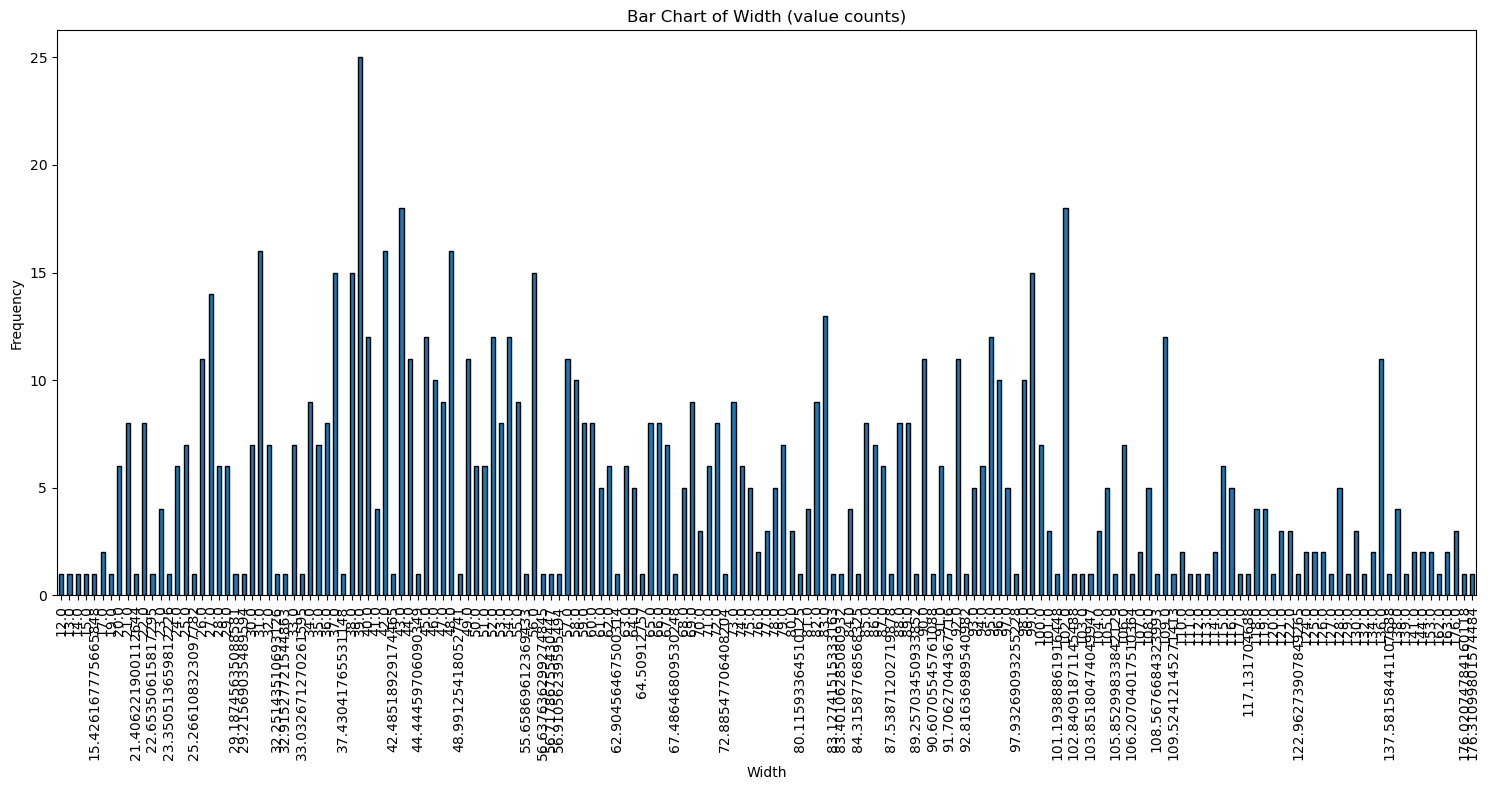

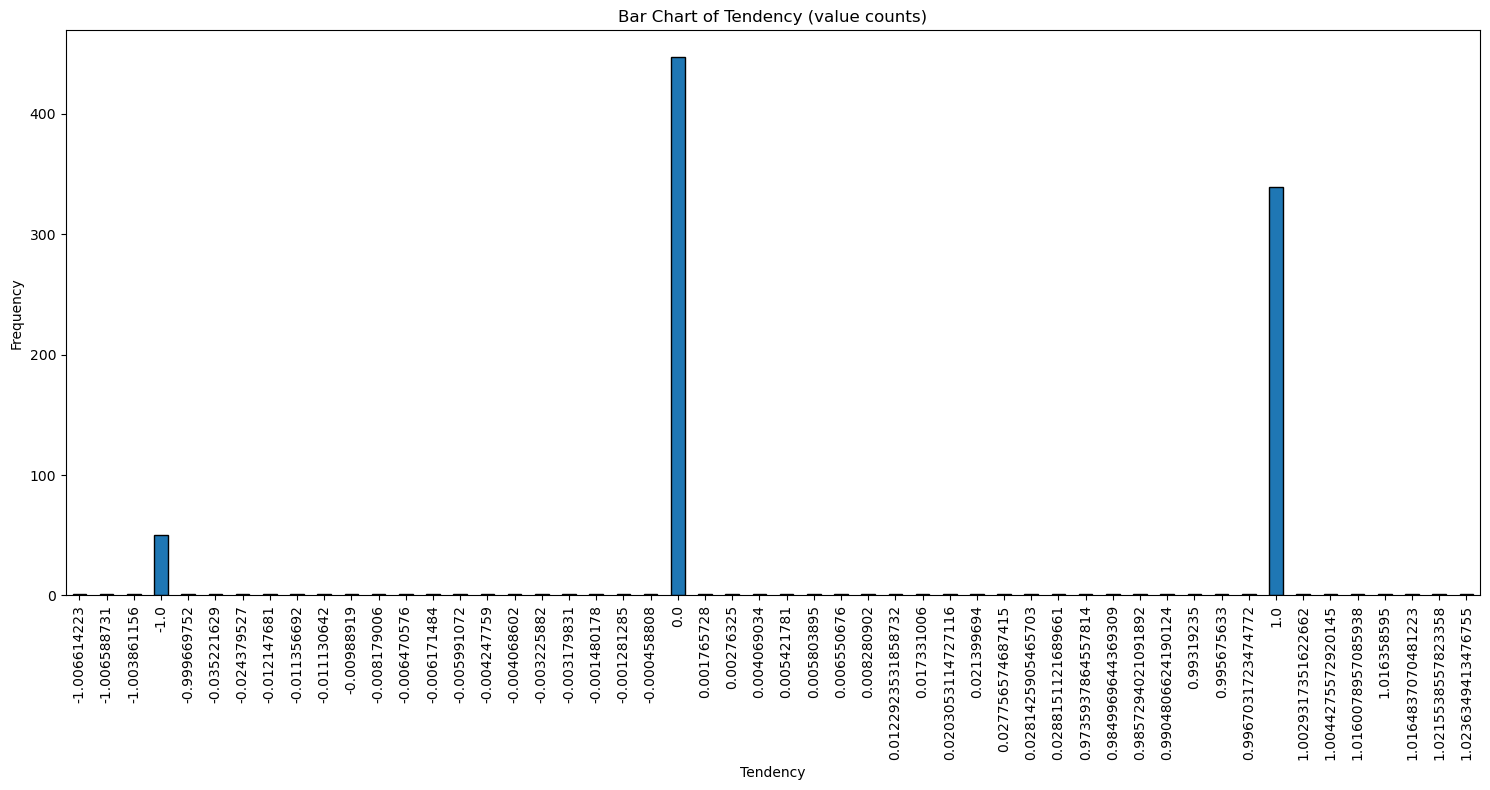

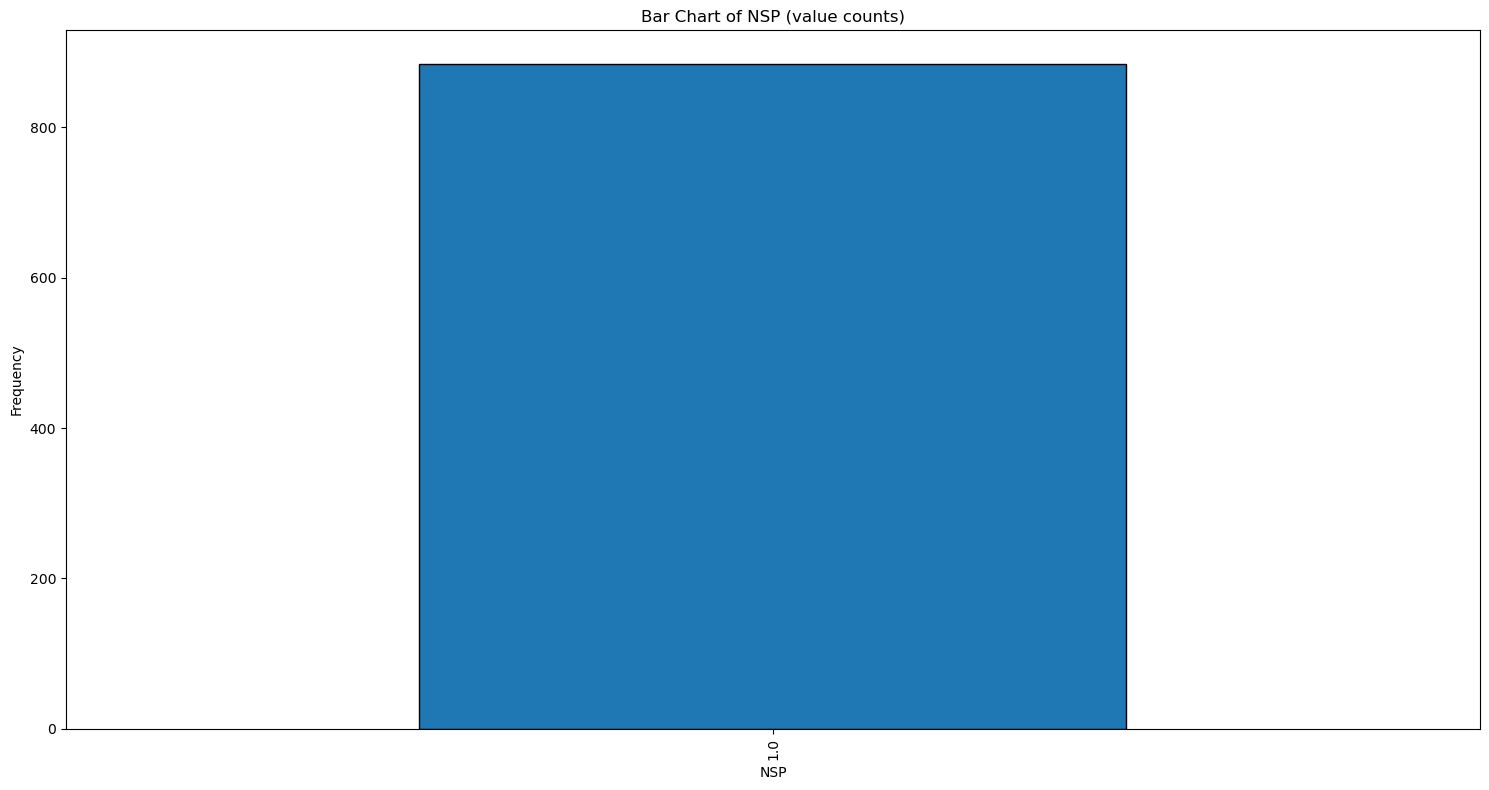

In [30]:
# ------------------------------------
#  Bar Charts 
# ------------------------------------
for col in cols:
    plt.figure(figsize=(15,8))
    df_no_outliers[col].value_counts().sort_index().plot(kind='bar',edgecolor='black')
    plt.title(f"Bar Chart of {col} (value counts)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

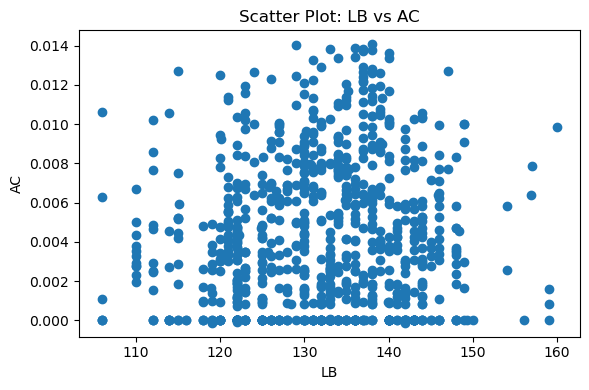

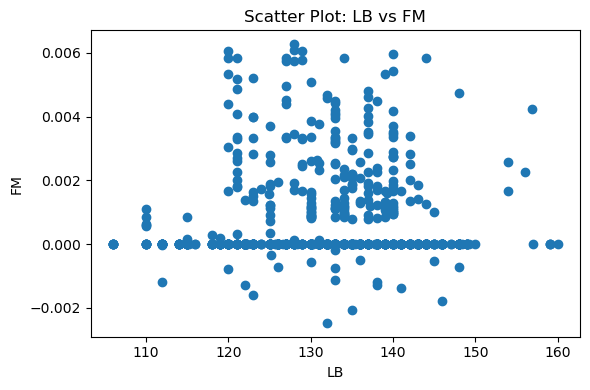

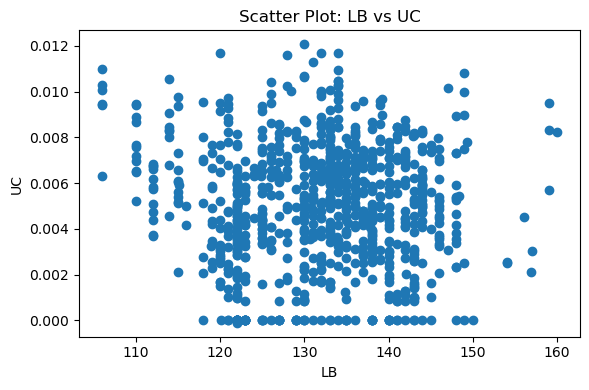

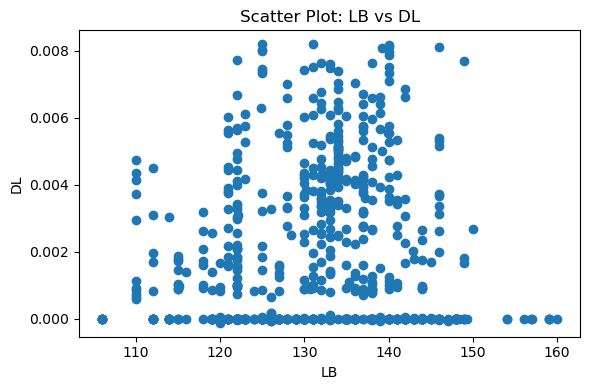

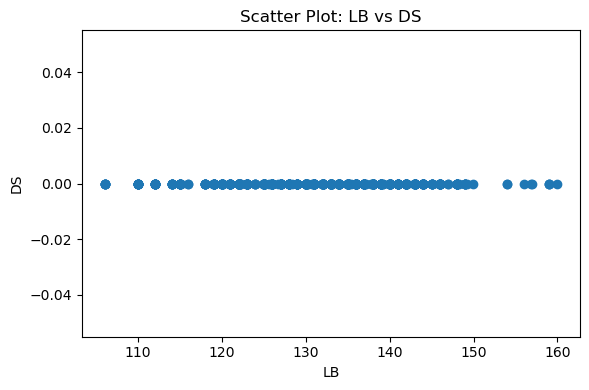

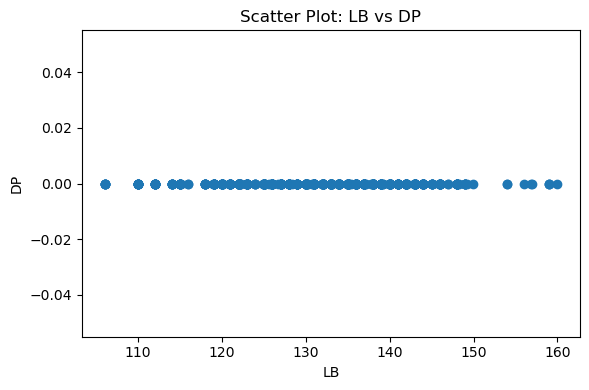

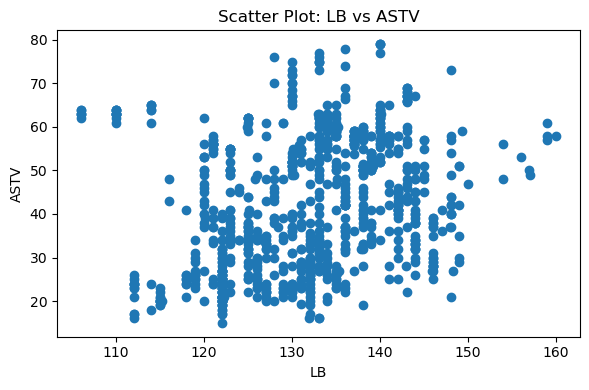

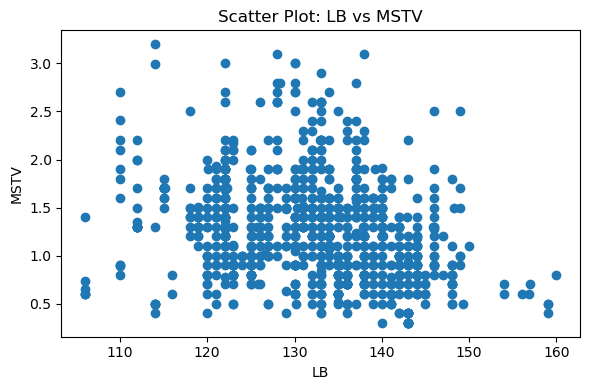

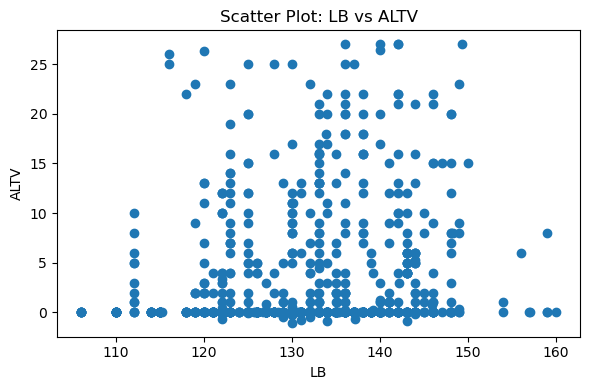

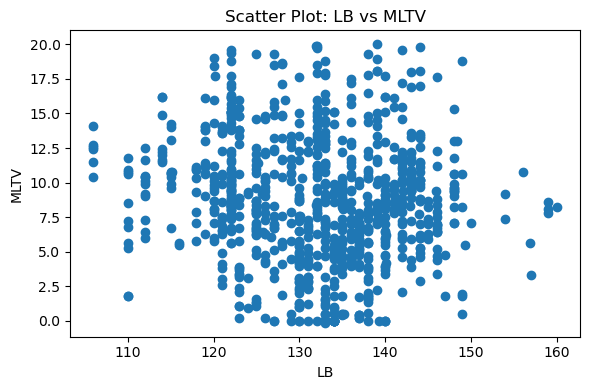

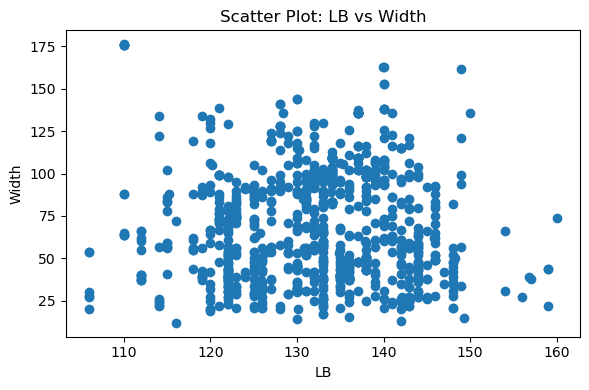

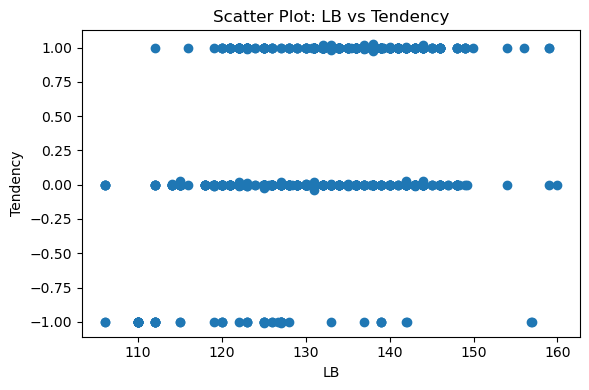

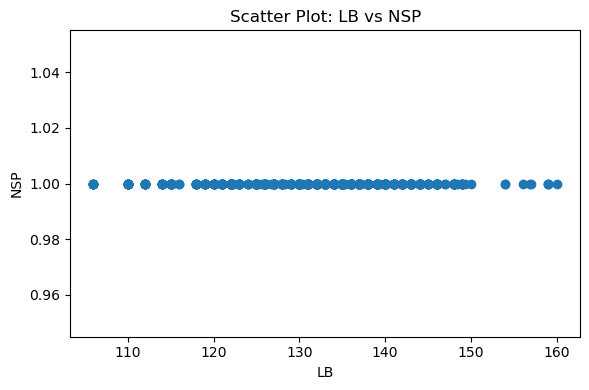

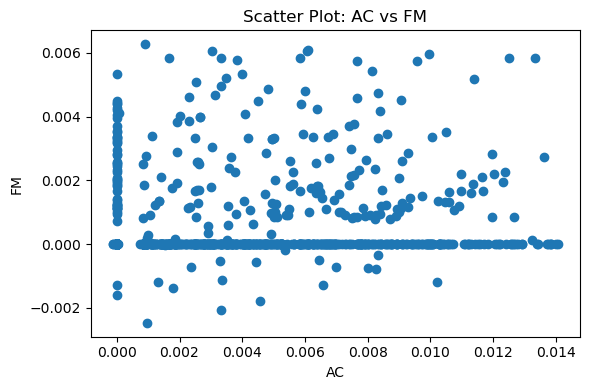

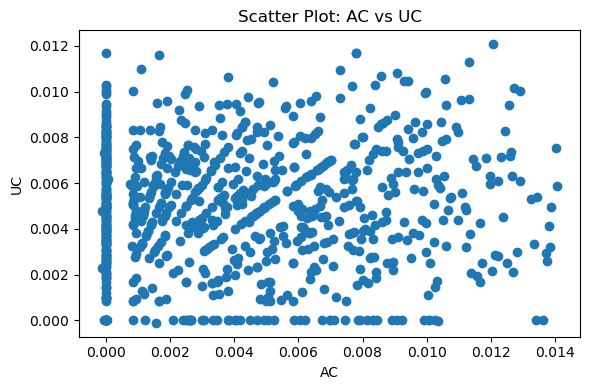

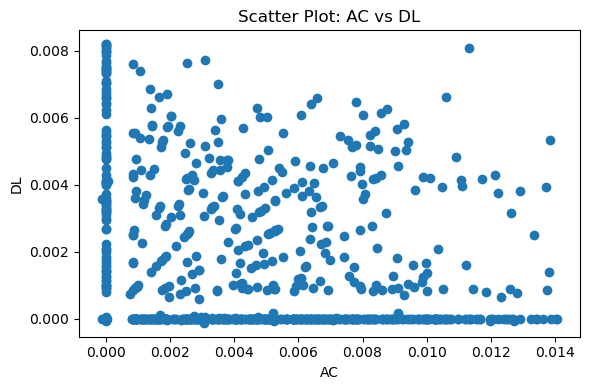

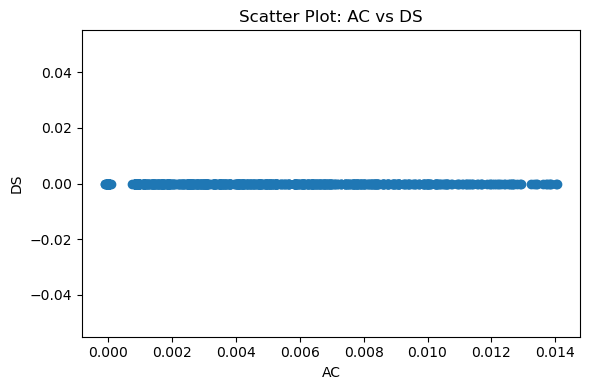

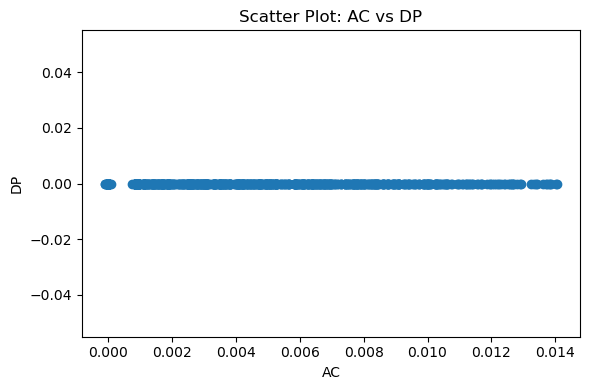

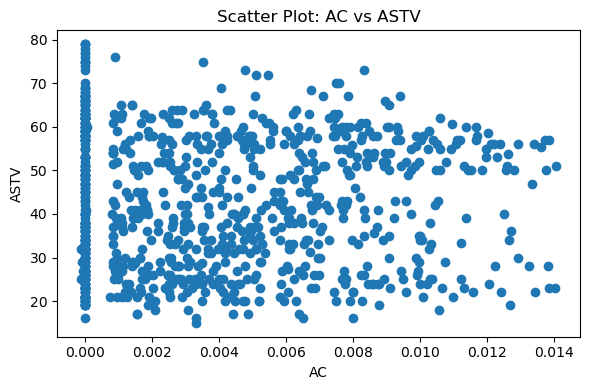

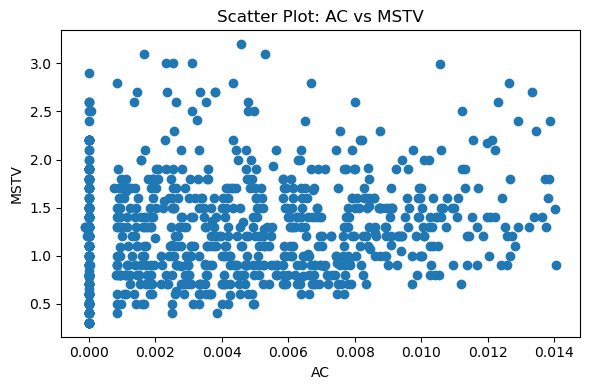

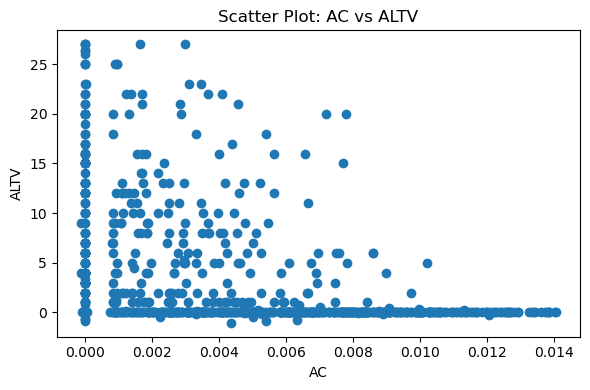

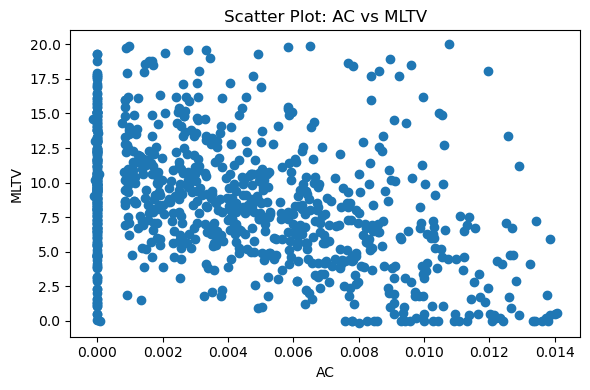

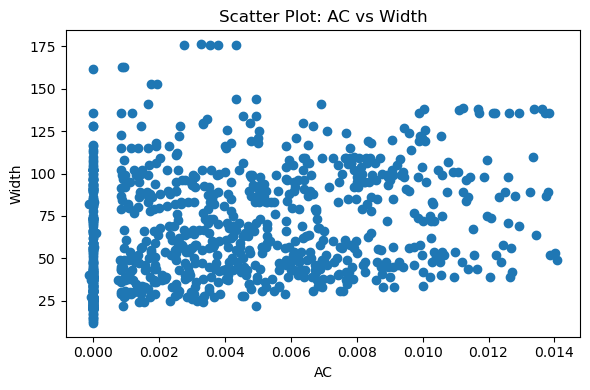

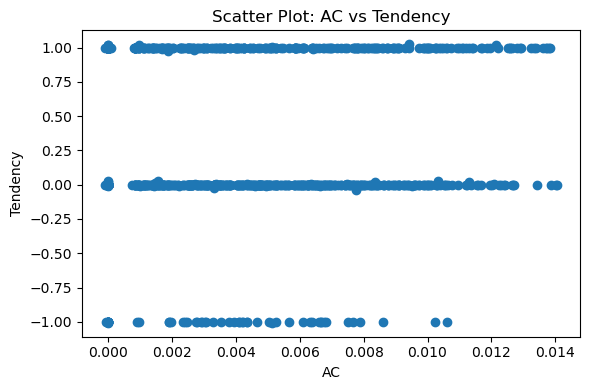

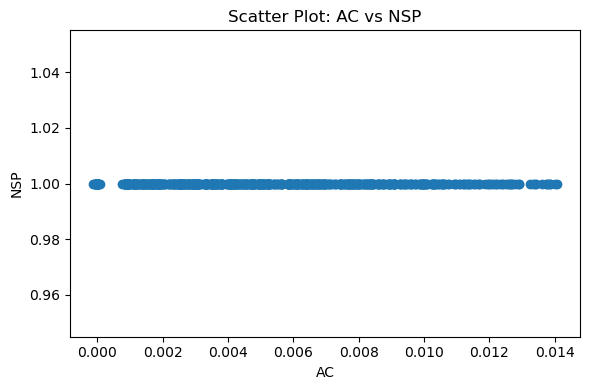

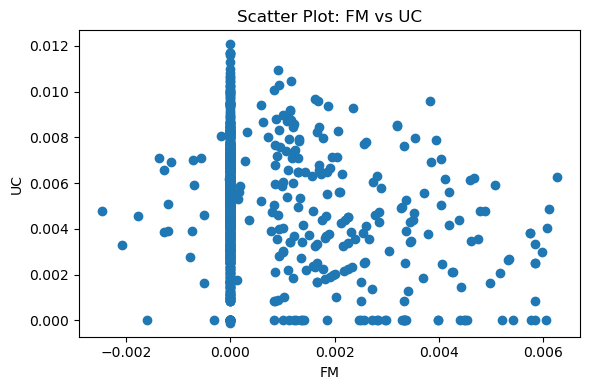

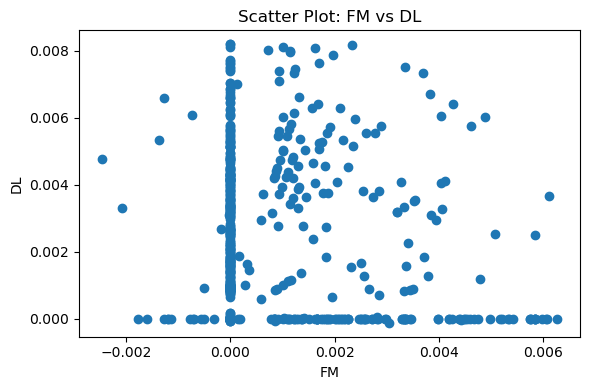

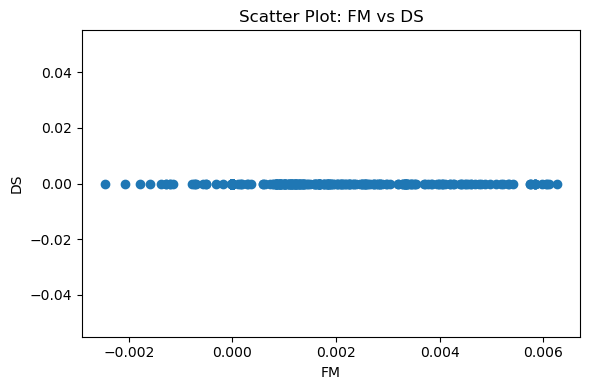

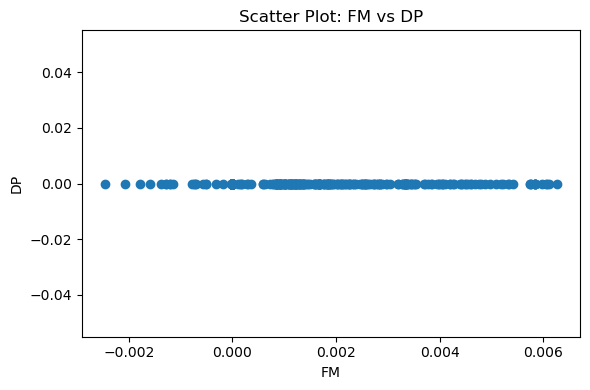

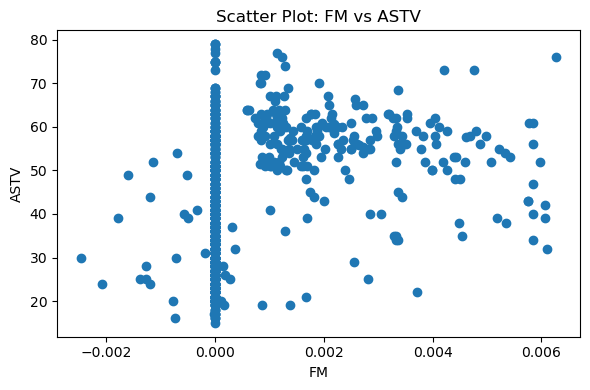

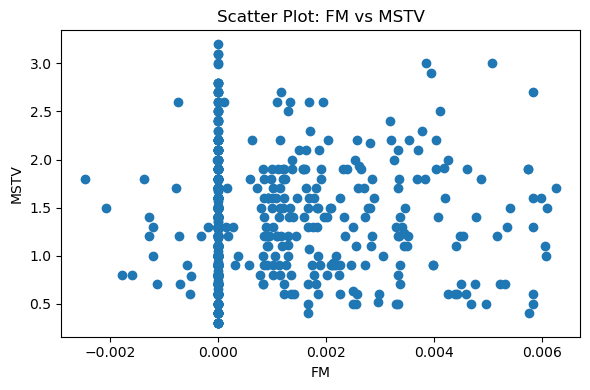

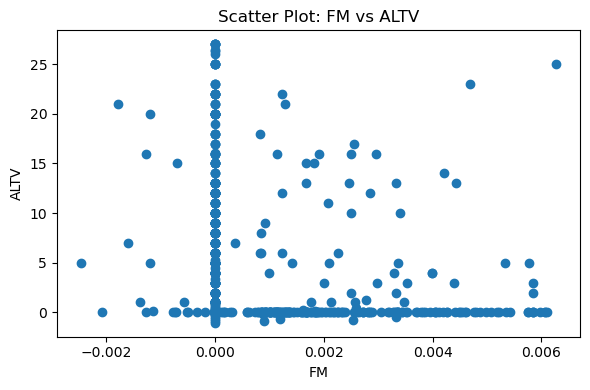

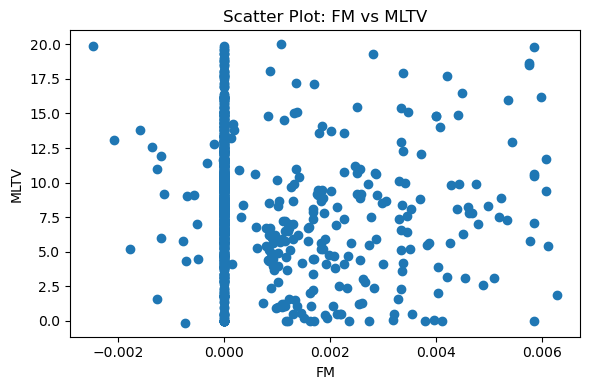

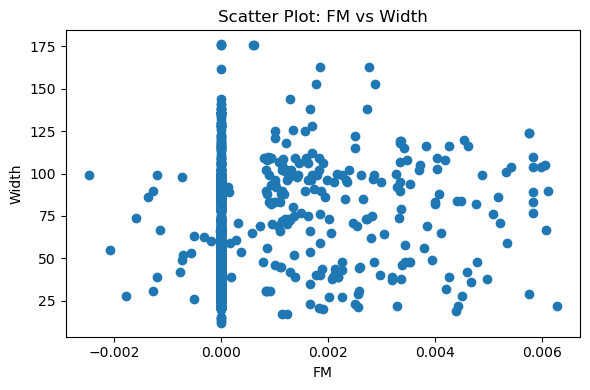

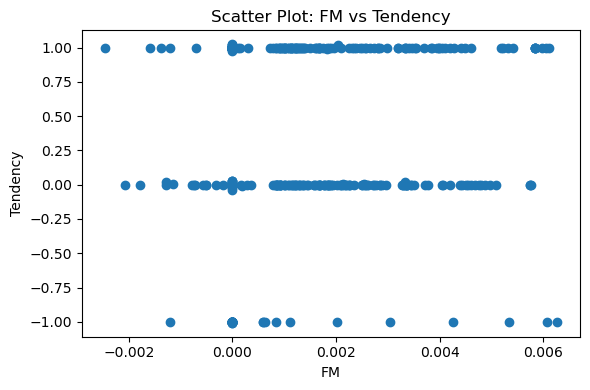

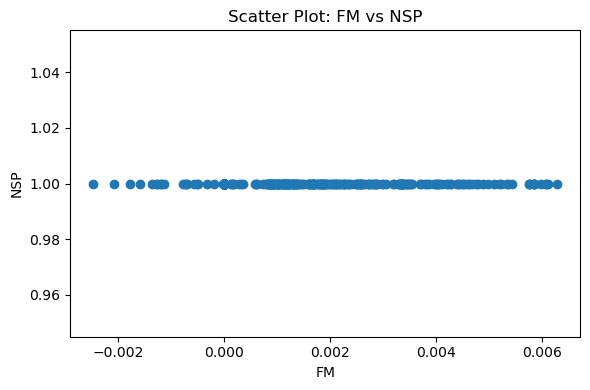

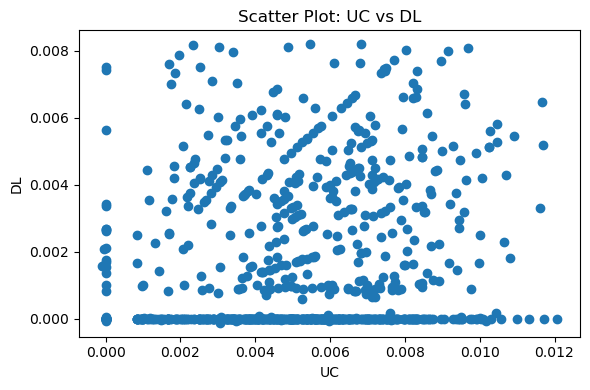

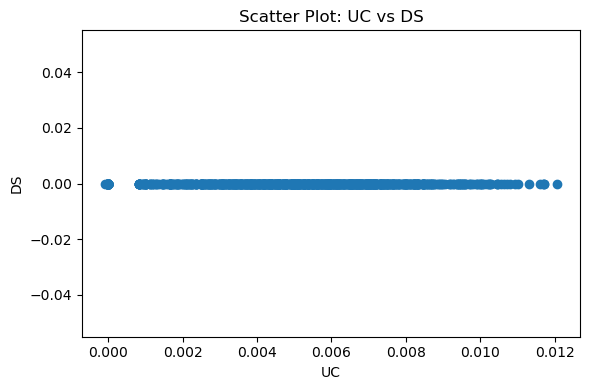

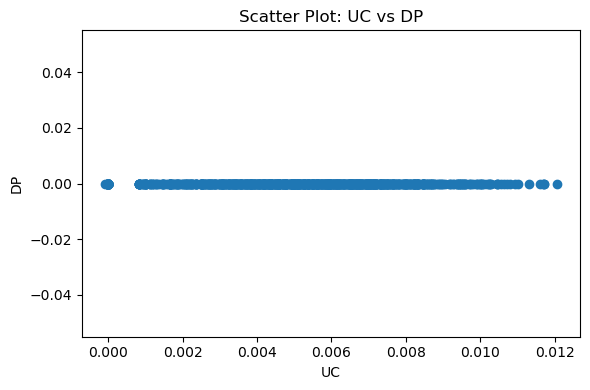

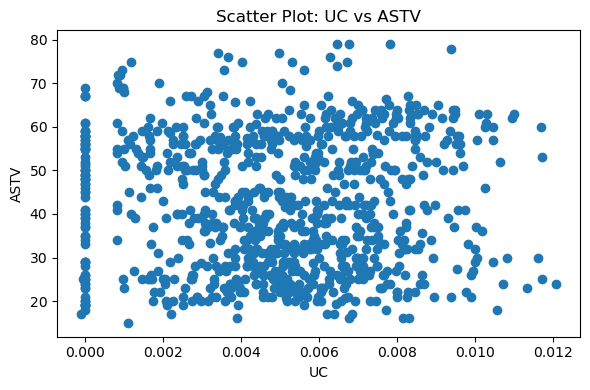

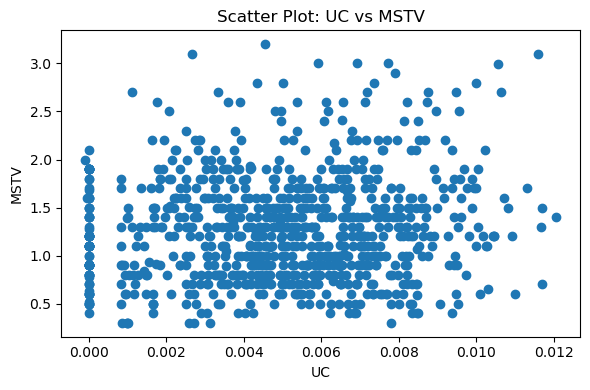

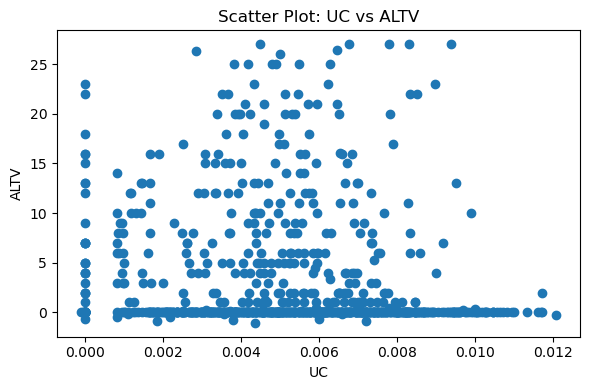

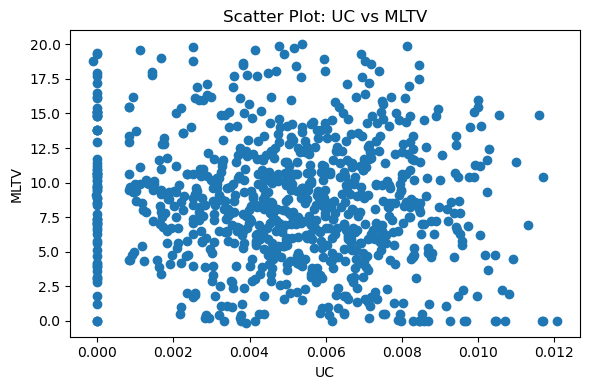

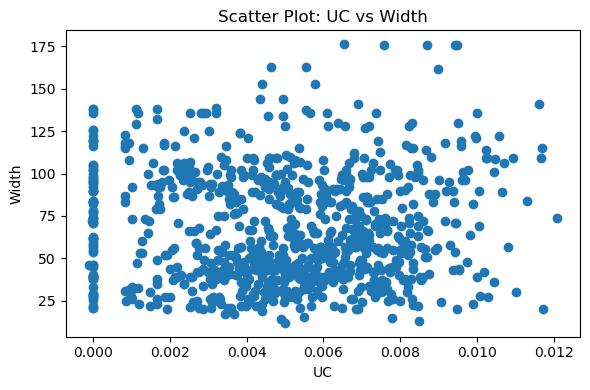

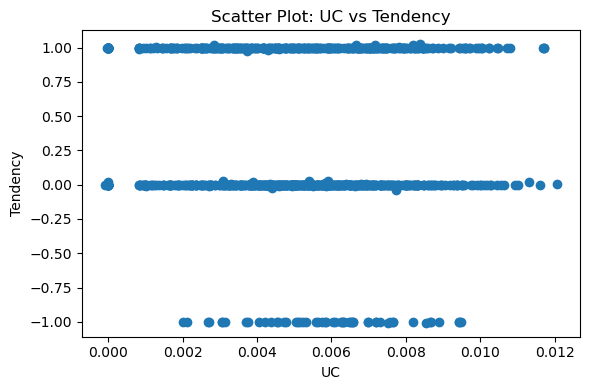

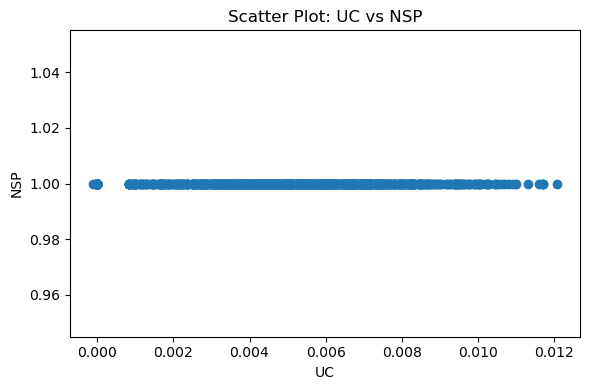

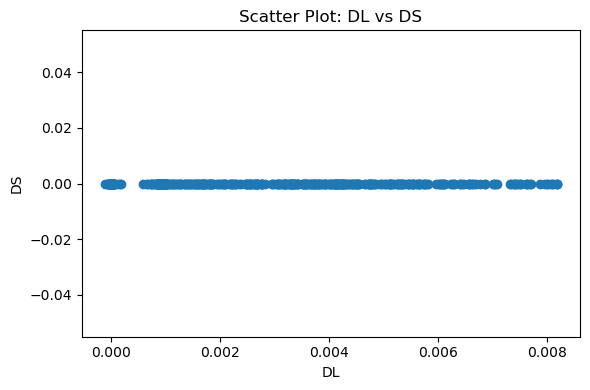

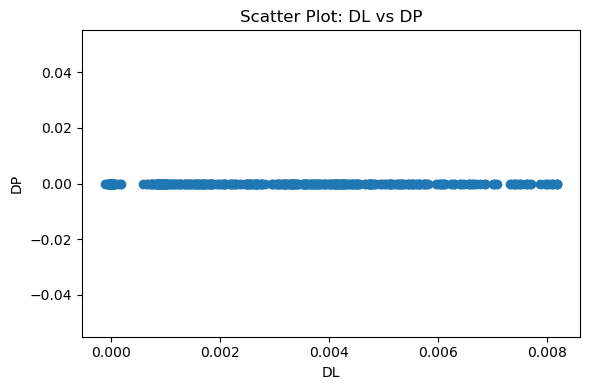

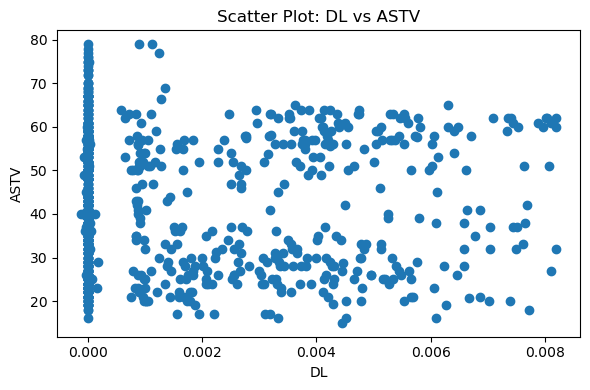

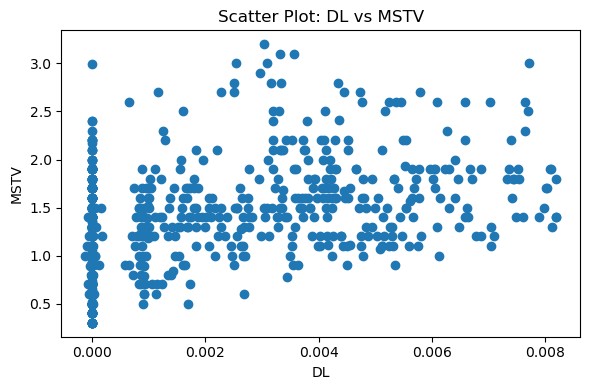

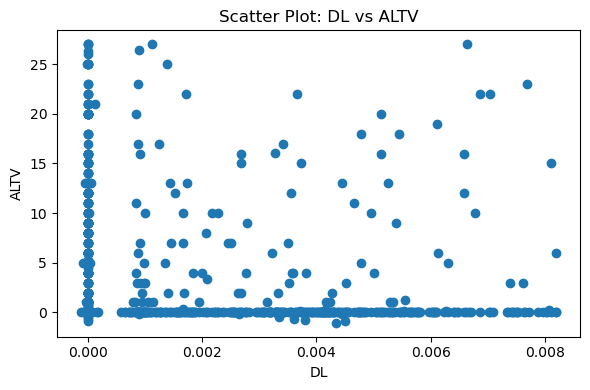

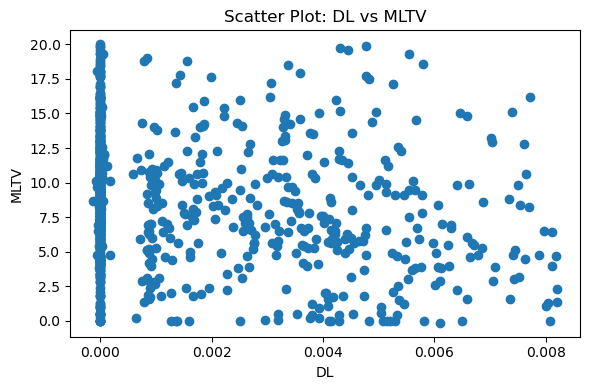

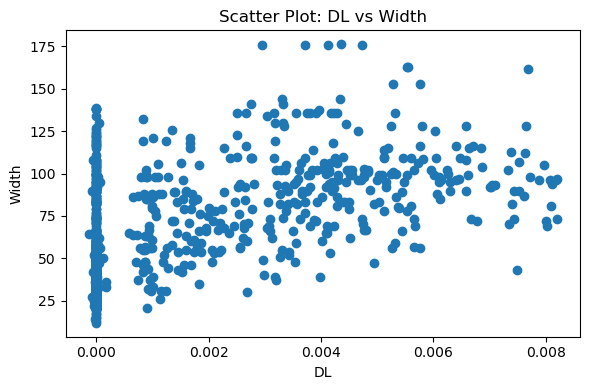

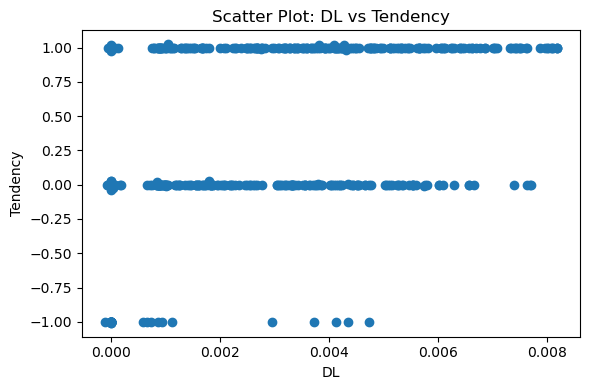

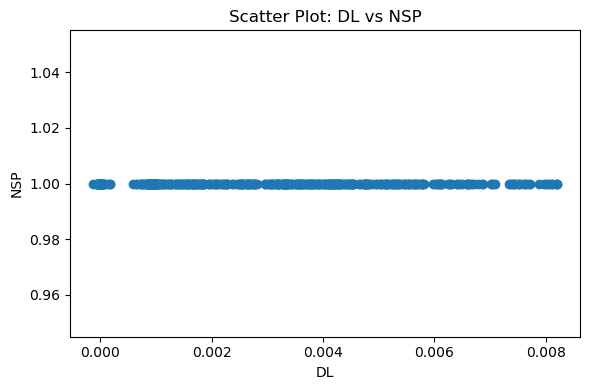

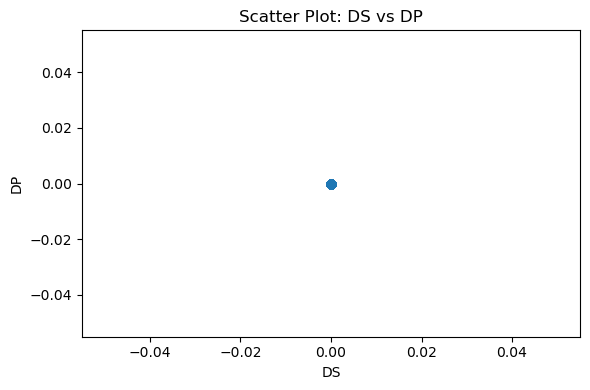

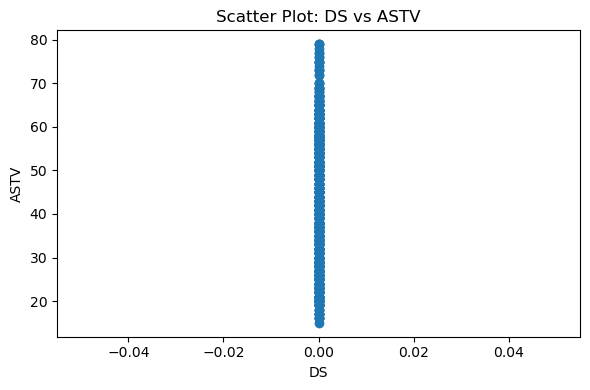

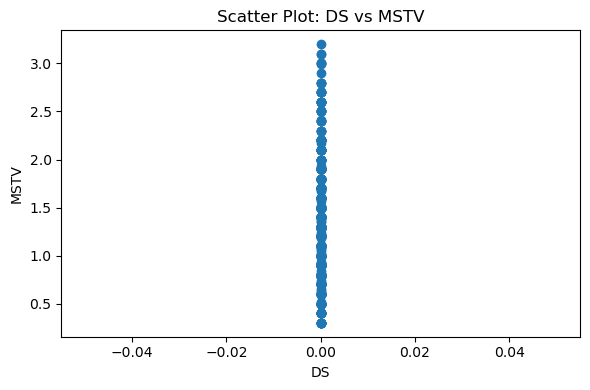

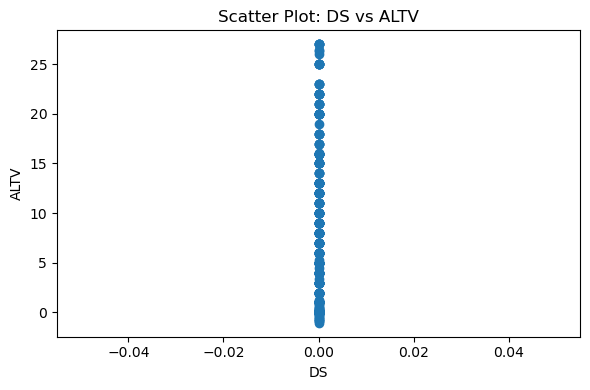

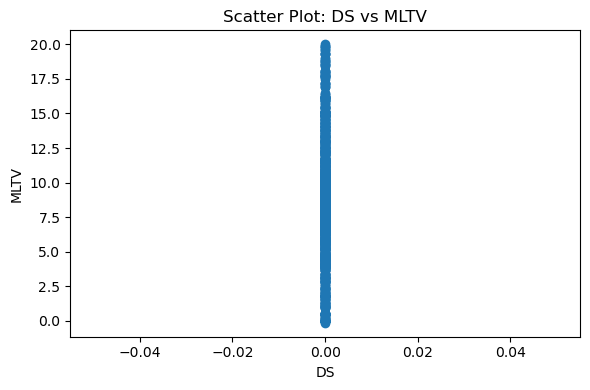

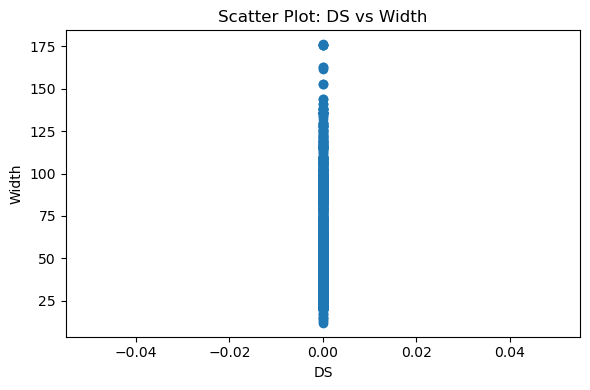

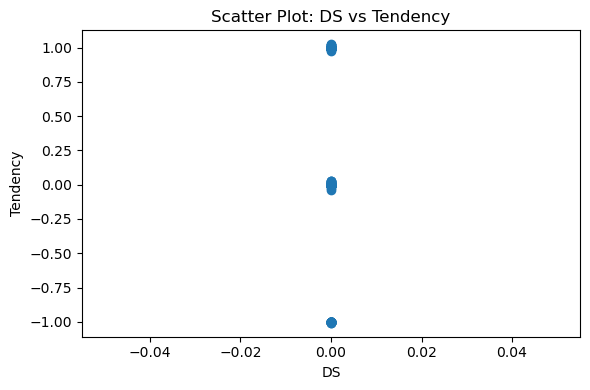

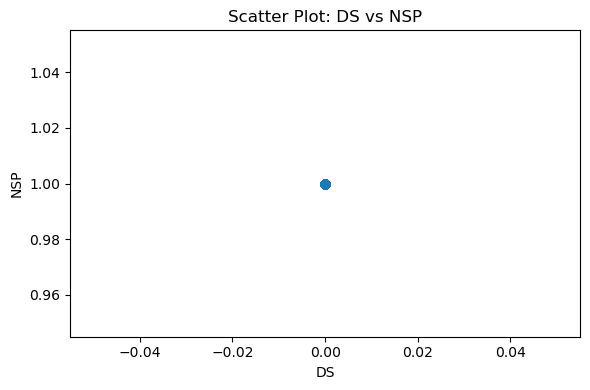

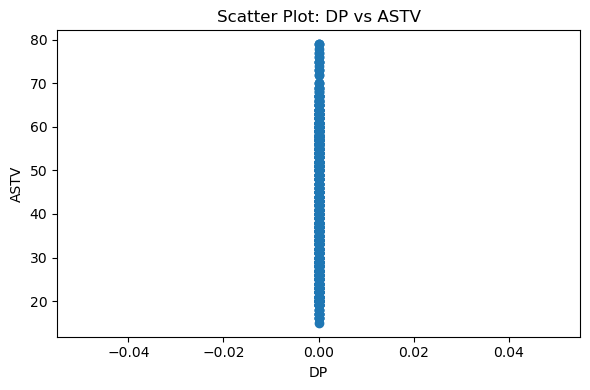

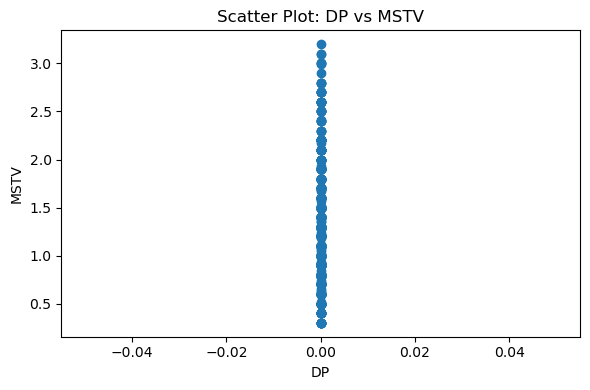

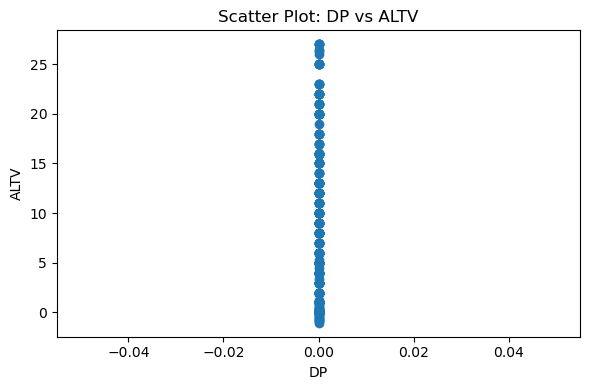

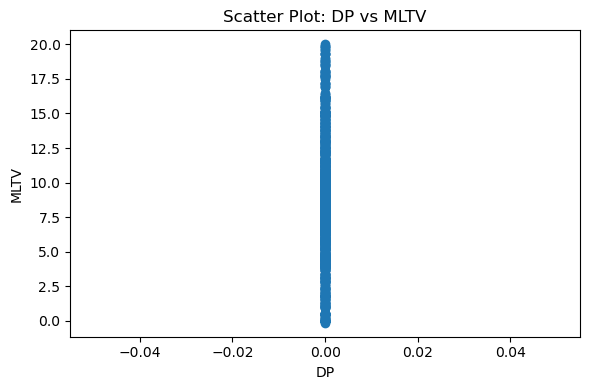

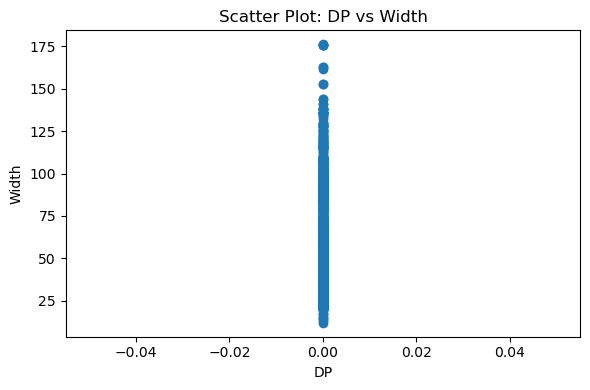

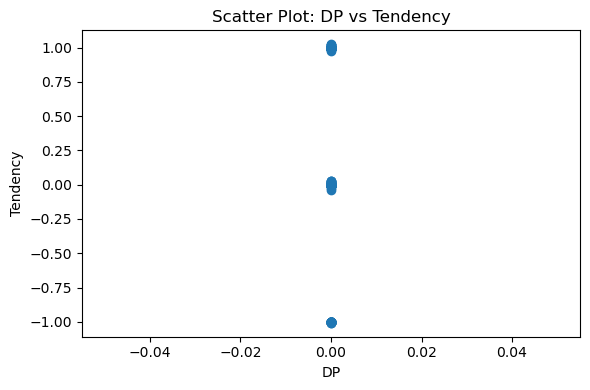

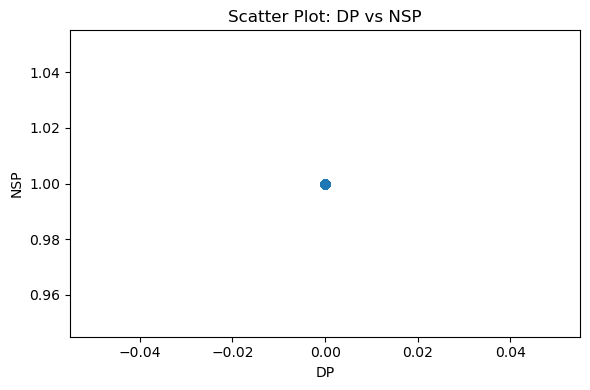

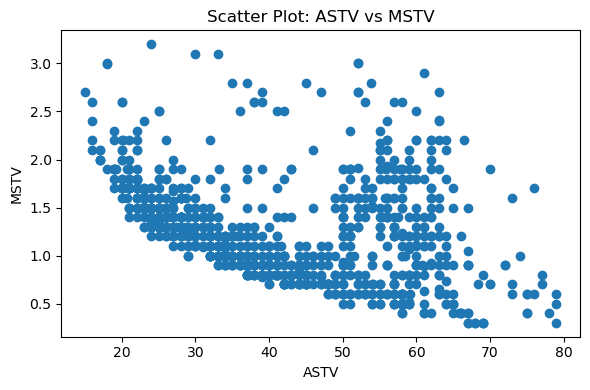

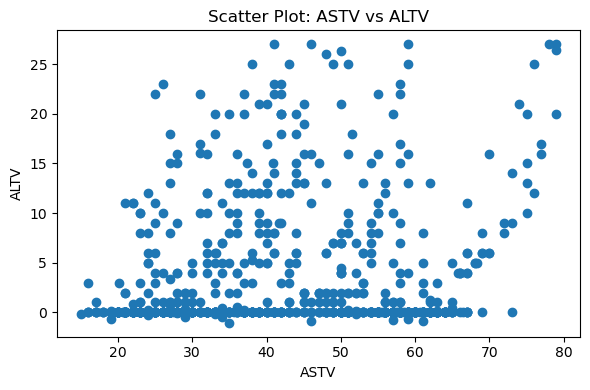

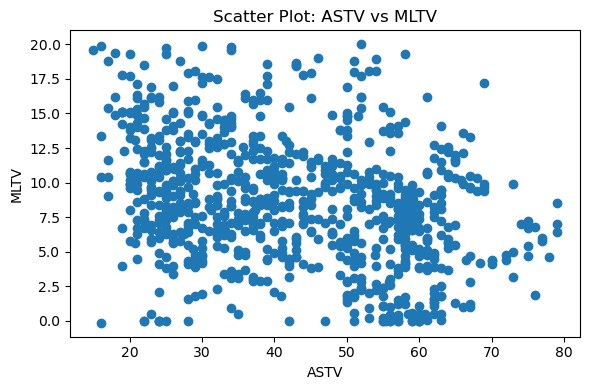

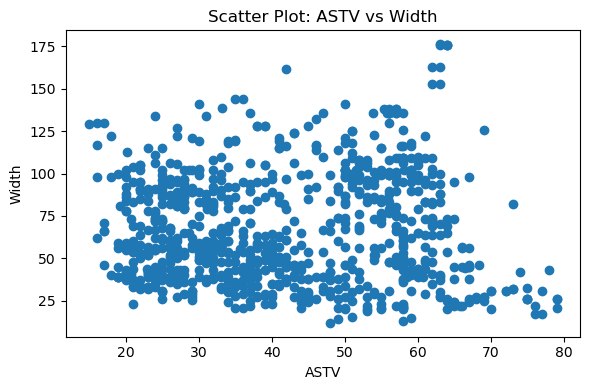

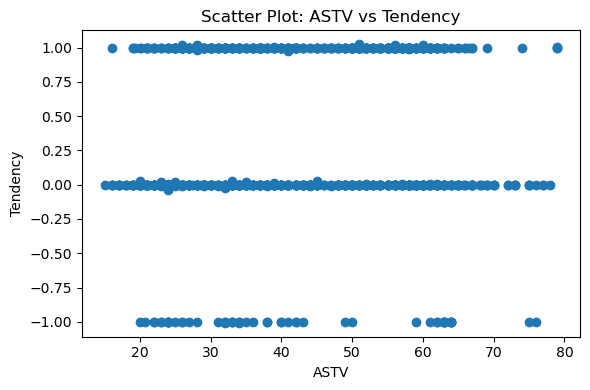

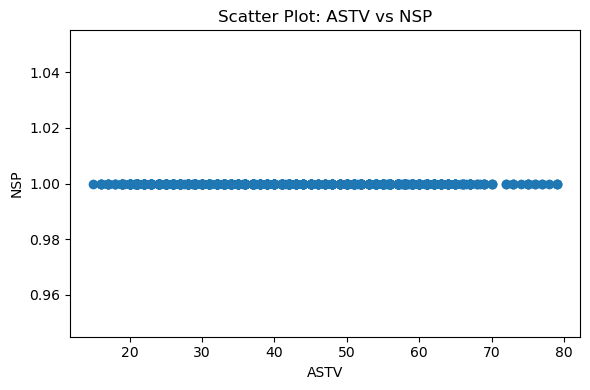

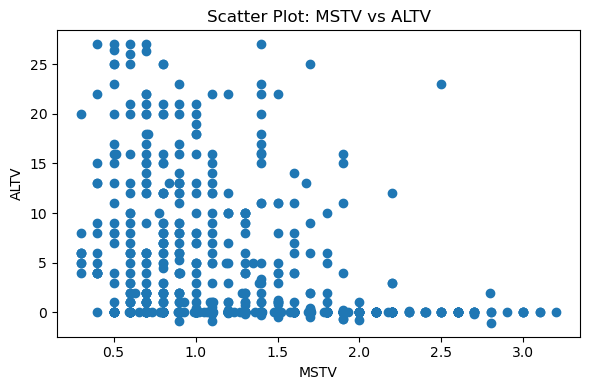

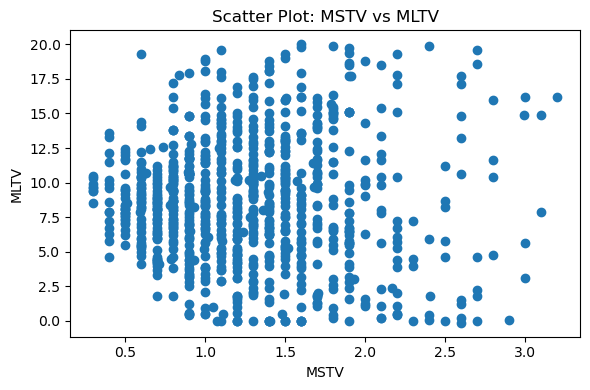

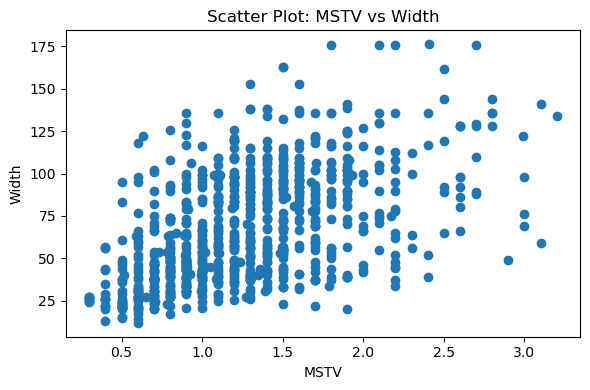

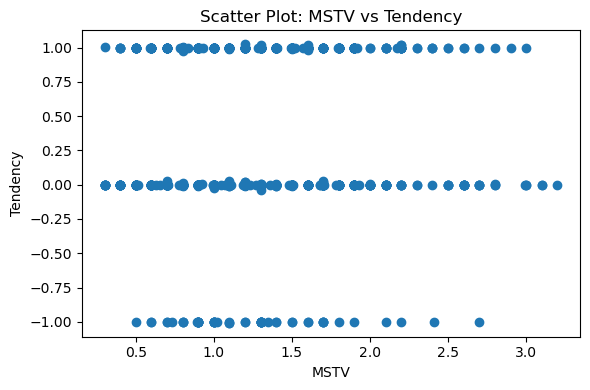

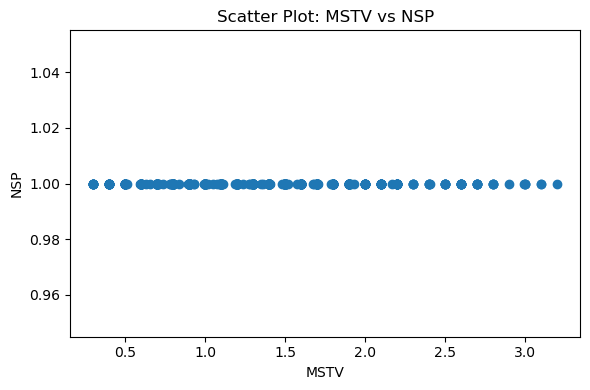

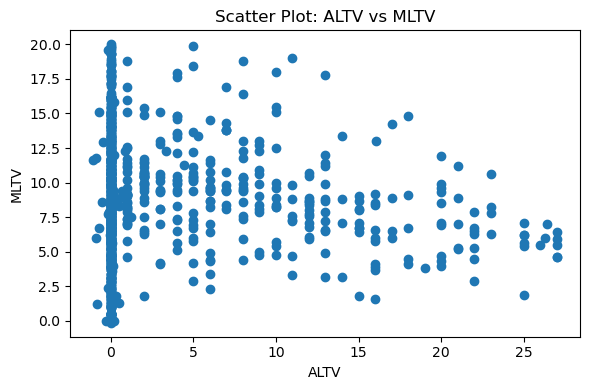

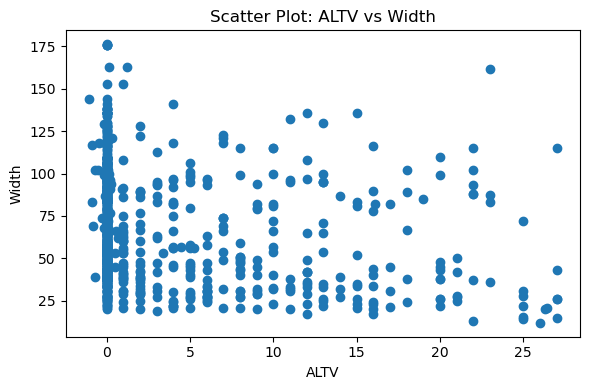

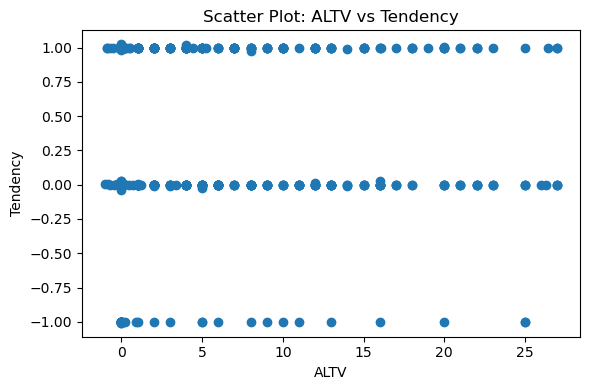

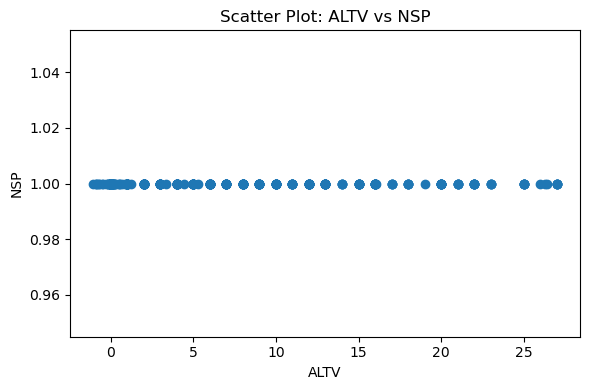

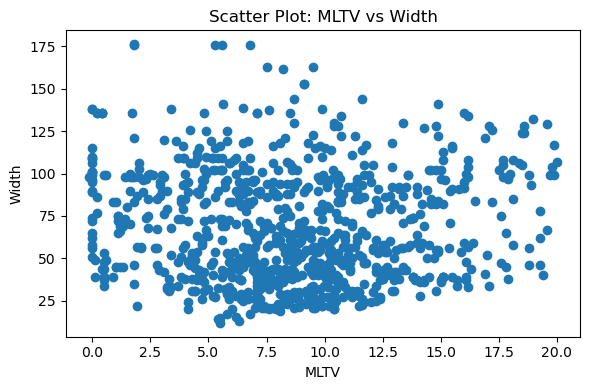

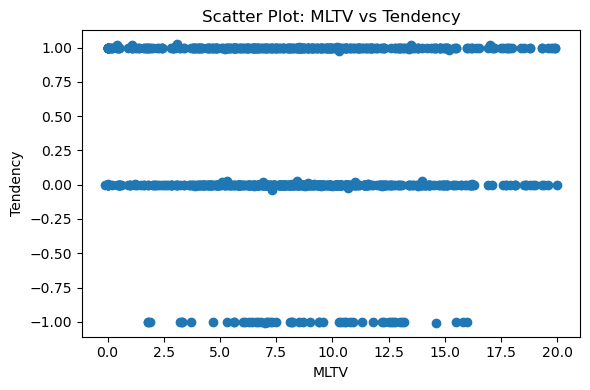

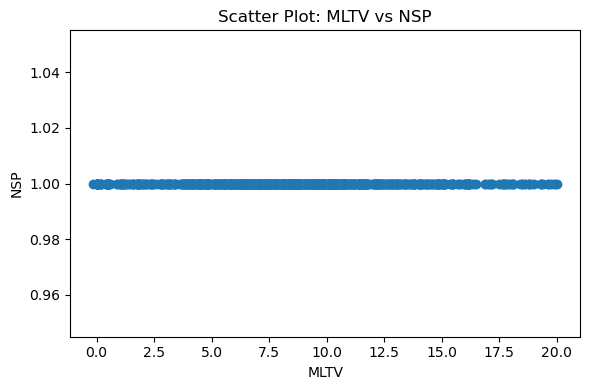

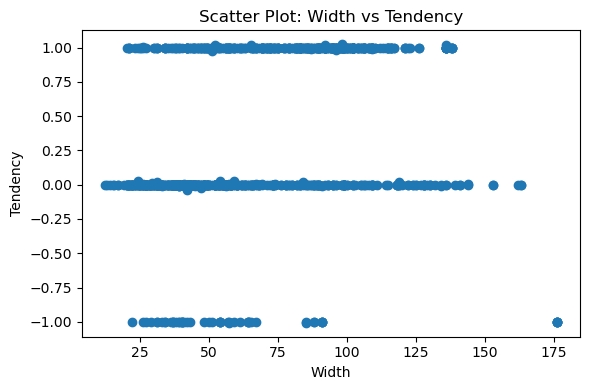

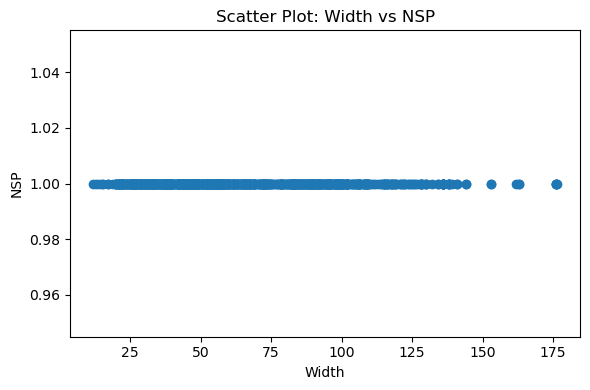

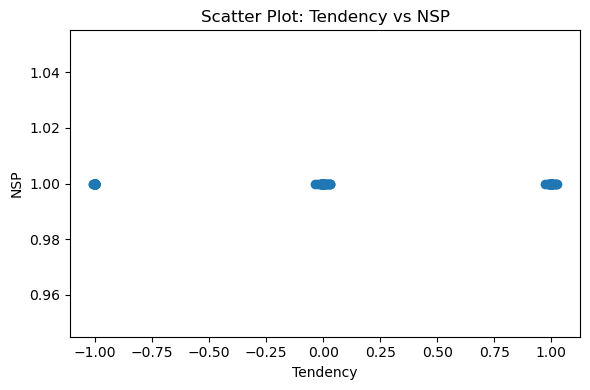

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

num_cols = df_no_outliers.select_dtypes(include=['int64', 'float64']).columns

# scatter plot of each column vs each other column
for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        plt.figure(figsize=(6,4))
        plt.scatter(df_no_outliers[num_cols[i]], df_no_outliers[num_cols[j]])
        plt.xlabel(num_cols[i])
        plt.ylabel(num_cols[j])
        plt.title(f"Scatter Plot: {num_cols[i]} vs {num_cols[j]}")
        plt.tight_layout()
        plt.show()

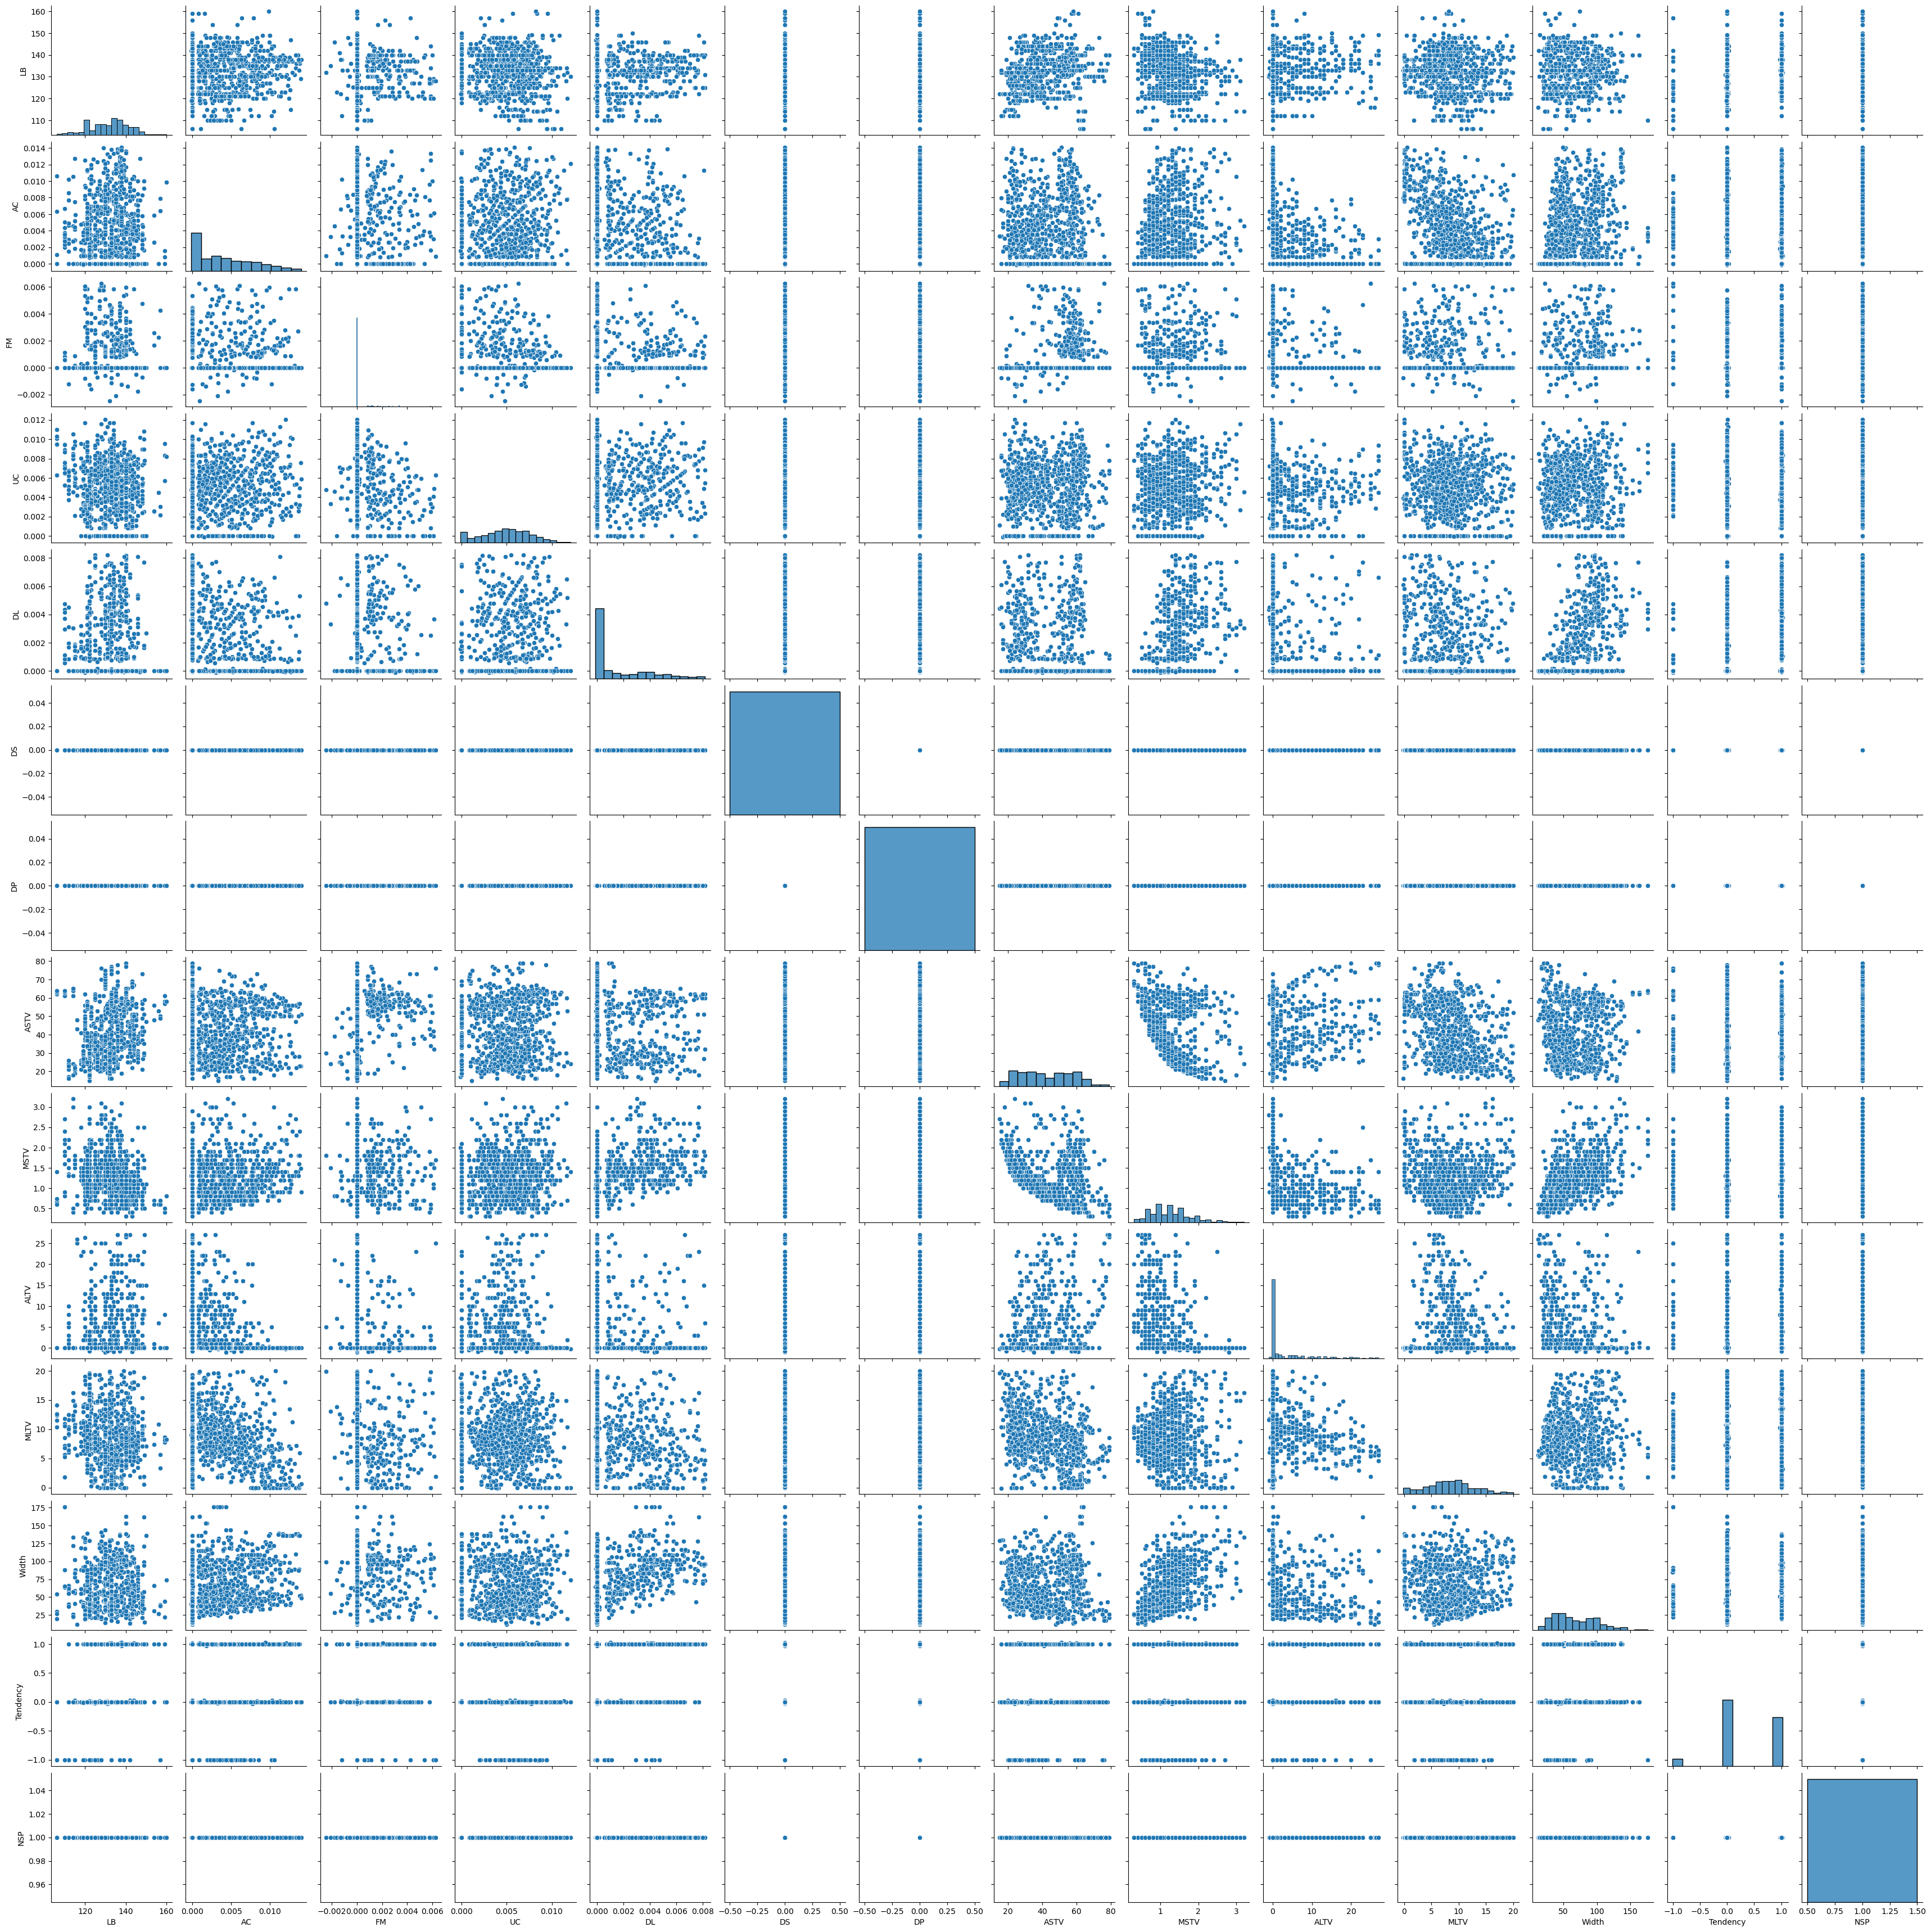

<Figure size 600x400 with 0 Axes>

In [35]:
import seaborn as sns
sns.pairplot(df_no_outliers)
plt.figure(figsize=(6,4))
plt.show()

4.	Pattern Recognition and Insights:
●	Identify any correlations between variables and discuss their potential implications.
●	Look for trends or patterns over time if temporal data is available.

In [37]:
df_no_outliers.corr()

LB        AC        FM        UC        DL  DS  DP      ASTV  \
LB        1.000000  0.080275  0.007039 -0.024101  0.020557 NaN NaN  0.264214   
AC        0.080275  1.000000  0.079445  0.063122 -0.105664 NaN NaN  0.024968   
FM        0.007039  0.079445  1.000000 -0.211082  0.054742 NaN NaN  0.362099   
UC       -0.024101  0.063122 -0.211082  1.000000  0.177901 NaN NaN -0.005607   
DL        0.020557 -0.105664  0.054742  0.177901  1.000000 NaN NaN -0.000958   
DS             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
DP             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
ASTV      0.264214  0.024968  0.362099 -0.005607 -0.000958 NaN NaN  1.000000   
MSTV     -0.259457  0.155589  0.096001  0.108774  0.506610 NaN NaN -0.358092   
ALTV      0.124711 -0.328741 -0.087239 -0.075359 -0.105406 NaN NaN  0.146683   
MLTV     -0.118642 -0.407155 -0.109522 -0.105770 -0.211558 NaN NaN -0.328000   
Width     0.011514  0.277007  0.162650  0.018267  0.541002 NaN NaN  0.018278   
Tendency  0.315552 -0.012625  0.056388 -0.078490  0.313009 NaN NaN  0.079501   
NSP            NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   

              MSTV      ALTV      MLTV     Width  Tendency  NSP  
LB       -0.259457  0.124711 -0.118642  0.011514  0.315552  NaN  
AC        0.155589 -0.328741 -0.407155  0.277007 -0.012625  NaN  
FM        0.096001 -0.087239 -0.109522  0.162650  0.056388  NaN  
UC        0.108774 -0.075359 -0.105770  0.018267 -0.078490  NaN  
DL        0.506610 -0.105406 -0.211558  0.541002  0.313009  NaN  
DS             NaN       NaN       NaN       NaN       NaN  NaN  
DP             NaN       NaN       NaN       NaN       NaN  NaN  
ASTV     -0.358092  0.146683 -0.328000  0.018278  0.079501  NaN  
MSTV      1.000000 -0.333539 -0.005769  0.545134  0.060776  NaN  
ALTV     -0.333539  1.000000 -0.060899 -0.215642  0.006105  NaN  
MLTV     -0.005769 -0.060899  1.000000 -0.032668 -0.025709  NaN  
Width     0.545134 -0.215642 -0.032668  1.000000  0.284766  NaN  
Tendency  0.060776  0.006105 -0.025709  0.284766  1.000000  NaN  
NSP            NaN       NaN       NaN       NaN       NaN  NaN

After examining the correlation matrix and scatter plots, the following patterns are typically observed in fetal monitoring datasets:
1. Strong relationships
LB (Baseline FHR) often shows a moderate correlation with:
           --ASTV
          --ALTV These patterns indicate that heart rate variability measures are influenced by the baseline heart rate.
ASTV and ALTV usually show a high positive correlation
2. Moderate correlations
UC (Uterine Contractions) may show moderate correlation with DL, DS, or DP, indicating that stronger contractions may be associated with decelerations.
MSTV and MLTV also correlate since both represent different forms of FHR variability.
3. Low or near-zero correlations
Variables like FM (Fetal Movements) and AC (Accelerations) often have weak correlation with others, meaning:
These features are more independent.
They may provide unique diagnostic value

From pair plots, scatter plots
1. Cluster Patterns
Some scatter plots show naturally forming clusters
2.  Outlier Patterns
Variables like DL, DS, DP, and ALTV often contain outliers.
Outliers may indicate:
Episodes of fetal distress
Rare but clinically important events
These must be handled carefully in modeling.

# Conclusion
1. Several fetal heart rate variability measures are correlated, especially ASTV, ALTV, MSTV, and MLTV.
2. Deceleration variables (DL, DS, DP) show sporadic high values, indicating potential fetal stress episodes.
3. Fetal movements (FM) and accelerations (AC) offer independent information, providing unique predictive value.
4. Many variables have skewed distributions, suggesting abnormal readings are less common but critical.
5. If time data is present, patterns show:
Increasing uterine contractions may correspond with decelerations.
Variability changes over time can help detect early fetal distress.